In [2]:
###start here post lunch - rename files

In [3]:
###Folders

Input_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Intermediate_objects/'
Output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'


'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

In [37]:
##Importing libraries
from joblib import dump, load
import os, sys, pickle, time, re, csv
from collections import defaultdict#

import numpy as np
import pandas as pd

import scipy.stats as st
#import pycircstat as circ_st
import math

import matplotlib.pyplot as plt
import seaborn as sns
import collections, numpy

from itertools import groupby
#from pingouin import partial_corr
from collections import Counter
import random
from sklearn.linear_model import LogisticRegression
from scipy.stats import circmean
from scipy.ndimage import gaussian_filter1d
import warnings
import statsmodels
from sklearn.preprocessing import MaxAbsScaler

from collections import Counter
from itertools import combinations
from scipy import stats, linalg



In [5]:
from collections import defaultdict
def rec_dd():
    return defaultdict(rec_dd)

def remove_empty(xx):

    yy= [x for x in xx if len(x) > 0]
    return(yy)

def random_rotation(length_array,angle_changes,sigma=10,noise_centre=5):
    rand_rotation=angle_changes[np.random.randint(0,len(angle_changes),size=length_array)]
    noise=np.random.normal(noise_centre,sigma,length_array) ##note, this is set to 5
    ##to make it equally likely to fall behind or ahead of cardinal axis when binned at 10 degree bins
    ##can just set to bin length/2
    return((rand_rotation+noise) % 360)

##convert nested dict into array
def dict_to_array(d):
    dictlist=[]
    for key, value in d.items():
        dictlist.append(value)
    return(np.asarray(dictlist))

##allows stacking two columns and removes rows containing nans/infs/-infs
def column_stack_clean(x,y):
    xy=np.column_stack((x,y))
    xy=xy[~np.isnan(xy).any(axis=1)]
    xy=xy[~np.isinf(xy).any(axis=1)]
    x=xy[:,0]
    y=xy[:,1]
    xy_new=np.column_stack((x,y))
    return(xy_new)

def rank_repeat(a):
    arr=np.zeros(len(a))
    for n in np.unique(a):
        count=0
        for ii in range(len(a)):
            if a[ii]==n:
                arr[ii]=count
                count+=1

    arr=arr.astype(int)
    return(arr)


##Defining Task grid
from scipy.spatial import distance_matrix
from itertools import product
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))
Task_grid_plotting=np.column_stack((Task_grid[:,1],Task_grid[:,0]))
Task_grid_plotting2=[]
for yy in np.arange(3):
    y=int(yy*2)
    for xx in np.arange(3):
        x=int(xx*2)    
        Task_grid_plotting2.append([x,y])
Task_grid_plotting2=np.asarray(Task_grid_plotting2)    
Task_grid2=np.column_stack((Task_grid_plotting2[:,1],Task_grid_plotting2[:,0]))

Edge_grid=np.asarray([[1,2],[2,3],[1,4],[2,5],[3,6],[4,5],[5,6],[4,7],[5,8],[6,9],[7,8],[8,9]]) ###
Edge_grid_=Edge_grid-1
Edge_grid_coord_x=[Task_grid[Edge_grid_[ii][0]][0]+Task_grid[Edge_grid_[ii][1]][0] for ii in range(len(Edge_grid_))]
Edge_grid_coord_y=rank_repeat(Edge_grid_coord_x)
Edge_grid_coord=np.column_stack((Edge_grid_coord_x,Edge_grid_coord_y))
Edge_grid_coord2=np.asarray([[0,1],[0,3],[1,0],[1,2],[1,4],[2,1],[2,3],[3,0],[3,2],[3,4],[4,1],[4,3]])

direction_dic={'N':[1,0],'S':[-1,0],'W':[0,1],'E':[0,-1]}
direction_dic_plotting={'N': [0, -1], 'S': [0, 1], 'W': [-1, 0], 'E': [1, 0]}


def mean_complex2(x):
    means=[]
    for i in x:
        meanx=np.nanmean(i)
        means.append(meanx)
    means=np.asarray(means)
    return(means)

def angle_to_distance(xx):
    return(np.asarray([1-math.cos(math.radians(xx[ii])) for ii in range(len(xx))]))

def concatenate_complex2(xx):

    ALL_elements=[]
    for ii in np.arange(len(xx)):
        xxii=xx[ii]
        for jj in np.arange(len(xxii)):
            xxiijj=xxii[jj]
            ALL_elements.append(np.asarray(xxiijj))
            
    return(np.asarray(ALL_elements))

def scramble(a, axis=-1):
    """
    Return an array with the values of `a` independently shuffled along the
    given axis
    """ 
    b = a.swapaxes(axis, -1)
    n = a.shape[axis]
    idx = np.random.choice(n, n, replace=False)
    b = b[..., idx]
    return b.swapaxes(axis, -1)


def rearrange_matrix(x,indices):
    xx=x[indices]
    xxx=xx[:,indices]
    return(xxx)

def timestamp_to_binary(timestampsx,lenses):
    yyy=np.zeros((lenses))
    timestamps=(timestampsx).astype(int)
    np.put(yyy,timestamps,1)
    return(yyy)

def plot_grouped_error(data,bins,groups,array_output=False):
    num_bins=len(bins)
    bin_value=np.digitize(np.argmax(groups,axis=1),bins)
    meanx=st.binned_statistic(bin_value,data,'mean',bins=np.arange(num_bins)+1)[0]
    semx=st.binned_statistic(bin_value,data,'std',bins=np.arange(num_bins)+1)[0]/np.sqrt(len(data))
    
    if array_output==True:
        return(bin_value)
    else:    
        plt.errorbar(bins[1:],meanx,semx)

def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rand_jitterX(arr, X):
    stdev = X*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def non_cluster_indices(neurons_clusters):
    indices_all=[]
    for cluster_ind,cluster in enumerate(neurons_clusters):
        if cluster_ind!=(len(neurons_clusters)-1):
            subsequent_cluster_members=np.concatenate(neurons_clusters[int(cluster_ind+1):])
            indices=np.vstack([[[cluster[ii],subsequent_cluster_members[jj]] for ii in range(len(cluster))]\
                     for jj in range(len(subsequent_cluster_members))])
            indices_all.append(indices)
    indices_all=np.vstack(indices_all)
    return(indices_all)

def positive_angle(xx):
    xxx=np.asarray([int(xx[ii]+360) if xx[ii]<0 else int(xx[ii]) for ii in range(len(xx))])
    xxx[xxx==360]=0
    return(xxx)
def circular_angle(x,y):
    pref_diff_lin=x-y
    pref_diff_circ=(pref_diff_lin + 180) % 360 - 180
    return(pref_diff_circ)

def edge_node_fill(edge_mat,node_mat):
    new_mat=np.copy(edge_mat)
    for ii in [0,2,4]:
        new_mat[ii,0]=node_mat[int(ii/2),0]
        new_mat[ii,2]=node_mat[int(ii/2),1]
        new_mat[ii,4]=node_mat[int(ii/2),2]
        
    return(new_mat)

def smooth_circular(x,sigma=10):
    return(gaussian_filter1d(np.hstack((x,x,x)),sigma,axis=0)[len(x):int(len(x)*2)])

def polar_plot_stateX(meanx,upperx,lowerx,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=None):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    ax = plt.subplot(111, projection='polar')
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=20)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=20)

    #plt.show()


                
def polar_plot_stateX2(meanx,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=[], structure_abstract='ABCD',fontsize=20,set_max=False,max_val=1):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    #ax=plt.subplot(111, projection='polar')
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        if set_max==False:
            ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        else:
            ax.set_rmax(max_val)
            
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        if structure_abstract=='ABCD':
            ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==False:
            ax.set_xticklabels(['A', '', '', '', 'B', '', '', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==True:
            ax.set_xticklabels(['A', '', 'B', '', 'A', '', 'B', ''],fontsize=fontsize)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=fontsize)
        
        

def indep_roll(arr, shifts, axis=1):
    """Apply an independent roll for each dimensions of a single axis.

    Parameters
    ----------
    arr : np.ndarray
        Array of any shape.

    shifts : np.ndarray
        How many shifting to use for each dimension. Shape: `(arr.shape[axis],)`.

    axis : int
        Axis along which elements are shifted. 
    """
    arr = np.swapaxes(arr,axis,-1)
    all_idcs = np.ogrid[[slice(0,n) for n in arr.shape]]

    # Convert to a positive shift
    shifts[shifts < 0] += arr.shape[-1] 
    all_idcs[-1] = all_idcs[-1] - shifts[:, np.newaxis]

    result = arr[tuple(all_idcs)]
    arr = np.swapaxes(result,-1,axis)
    return arr 

def bar_plotX(y,name,ymin,ymax,points,pairing,jitt):
    leny=len(y)
    plt.figure(figsize=(leny*(3/2),6))
    
    if ymin =='auto':
        ymin=np.min(np.concatenate(y))
    if ymax =='auto':
        ymax=np.max(np.concatenate(y))
    
    ##bars
    y_mean=((np.zeros(len(y))))
    y_sem=((np.zeros(len(y))))
    for ii in range(0, len(y)):
        ymeanx=np.nanmean(y[ii])
        y_mean[ii]=ymeanx
        ysemx=st.sem(y[ii], nan_policy='omit')
        y_sem[ii]=ysemx
   
    
    xxx=np.linspace(0.15, 0.2+(0.2*(leny-1)), leny)

    xlocations = np.array(range(len(xxx)))
    width=0.2
    plt.bar(xxx, y_mean, width, yerr=y_sem, alpha=1, 
           error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center')
    
    if points != 'points' and ymin == 'auto':
        ymin=np.min(y_mean-y_sem) #-np.max(y_sem)
        ymax=np.max(y_mean+y_sem) #+np.max(y_sem)
    
    #if ymin>0:
    #    ymin=0
    plt.ylim(ymin-(0.05*(ymax-ymin)),ymax+(0.05*(ymax-ymin)))
    plt.xlim(0,np.max(xxx)+0.15)
    
    

    ###points and lines
    if points == 'points':
        yyALL=[]
        for ii in range(0, len(y)):
            yy=np.column_stack((y[ii],np.repeat(xxx[ii],len(y[ii]))))
            yyALL.append(yy)

        xy=np.vstack((yyALL))
        jittered=rand_jitterX(xy[:,1],jitt)

        if pairing == 'paired':
            for ii in range(0, leny):
                x1=np.split(jittered,len(y))[ii]
                if ii == 0:
                    x1_all=x1
                else:
                    x1_all=np.column_stack((x1_all,x1))

            for jj in range(0,np.shape(y)[1]):
                yyyy=np.asarray(y)[:,jj]
                plt.plot(x1_all[jj],yyyy, color='gray')
        plt.plot(jittered,xy[:,0],'o',markersize=7,color='white',markeredgecolor='black')
    
    if name != 'none':
        plt.savefig(name)
    
    #plt.show()

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def noplot_scatter(x,y, color):
    plt.plot(x, y, 'o', color=color, alpha=0.7,markersize=7)
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))
    
    global xmin
    global xmax
    global ymin
    global ymax
    
    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1    
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    


    #plt.xlim(-0.2,0.2)
    #plt.ylim(-0.2,0.2)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.gca().set_aspect('equal', adjustable='box')
    
def noplot_timecourseA(x,y,color):
    ymean=np.nanmean(y, axis=0)
    yerr=st.sem(y, axis=0, nan_policy='omit')
    plt.errorbar(x,ymean, yerr=yerr, color=color, marker='o')
    
def circular_sem(a):
    if len(np.shape(a))==2:
        sem_=np.rad2deg(np.hstack(([st.circvar(remove_nan(a[:,ii]))/np.sqrt(len(remove_nan(a[:,ii])))\
                               for ii in range(len(a.T))])))
    elif len(np.shape(a))==1:
        sem_=np.rad2deg(st.circvar(remove_nan(a))/np.sqrt(len(remove_nan(a))))
        
    return(sem_)
    
def non_repeat_ses_maker(mouse_recday):
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
    num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)

    non_repeat_bool_all=[]
    for ses_ind in np.arange(len(Tasks)):
        if ses_ind==0:
            non_repeat_bool=True
        else:
            num_prev_repeats=np.sum([np.array_equal(Tasks[ses_ind],Tasks[:ses_ind][jj])\
                                     for jj in range(len(Tasks[:ses_ind]))])
            if num_prev_repeats==0:
                non_repeat_bool=True
            else:
                non_repeat_bool=False

        non_repeat_bool_all.append(non_repeat_bool)
    non_repeat_bool_all=np.hstack((non_repeat_bool_all))
    num_trials_bool=num_trials_day>0
    non_repeat_ses_bool=np.logical_and(non_repeat_bool_all,num_trials_bool)

    non_repeat_ses=np.where(non_repeat_ses_bool==True)[0]
    return(non_repeat_ses)

def two_proportions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)
    
def remove_nan(x):
    x=x[~np.isnan(x)]
    return(x)

def unique_nosort(a):
    indexes = np.unique(a, return_index=True)[1]
    return(np.asarray([a[index] for index in sorted(indexes)]))


def number_of_repeats(array):
    return(np.asarray([sum(1 for _ in group) for _, group in groupby(array)]))

def number_of_repeats_ordered(array):
    return(np.asarray([sum(1 for _ in group) for _, group in groupby(array)]))

def number_of_repeats_ALL(array):
    unique_rows=np.unique(array,axis=0)
    return(np.asarray([sum((array == unique_rows[ii]).all(1)) for ii in range(len(unique_rows))]))


def arrange_plot_statecells_persessionX(mouse_recday,neuron,awake_sessions,standardized_FR_smoothed_all,\
                                        standardized_FR_sem_all,sessions_included=None\
                                       ,fignamex=False,sigma=10,\
                                       save=False,plot=False,figtype='.svg', Marker=False,\
                                       fields_booleanx=[],measure_type='mean', abstract_structures=[],\
                                      repeated=False):
    
    colors=np.repeat('blue',len(awake_sessions))
    plot_boolean=np.repeat(False,len(awake_sessions))
    plot_boolean[sessions_included]=True
    

    fig= plt.figure(figsize=plt.figaspect(1)*4.5)
    fig.tight_layout()
    for awake_session_ind, timestamp in enumerate(awake_sessions):
        structure_abstract=abstract_structures[awake_session_ind]
        standardized_FR_smoothed=standardized_FR_smoothed_all[awake_session_ind]
        standardized_FR_sem=standardized_FR_sem_all[awake_session_ind]
                    
        if len(standardized_FR_smoothed)==0:
            print('Empty: Possibly No trials completed')
            continue
        
        
        standardized_FR_smoothed_upper=standardized_FR_smoothed+standardized_FR_sem
        standardized_FR_smoothed_lower=standardized_FR_smoothed-standardized_FR_sem
       
        
        color=colors[awake_session_ind]
        
        ax = fig.add_subplot(1, len(awake_sessions), awake_session_ind+1, projection='polar')
        if len(fields_booleanx)>0:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=Marker,fields_booleanx=fields_booleanx[awake_session_ind],\
                             structure_abstract=structure_abstract,repeated=repeated)
        else:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=False,structure_abstract=structure_abstract,repeated=repeated)
    plt.margins(0,0)
    plt.tight_layout()
    if save==True:
        plt.savefig(fignamex+str(awake_session_ind)+figtype, bbox_inches = 'tight', pad_inches = 0)
    if plot==True & plot_boolean[awake_session_ind]==True:
        plt.show()
    else:
        plt.close() 
        
def arrange_plot_statecells_persessionX2(mouse_recday,neuron,Input_folder,sessions_included=None\
                                       ,fignamex=False,sigma=10,\
                                       save=False,plot=False,figtype='.svg', Marker=False,\
                                       fields_booleanx=[],measure_type='mean', abstract_structures=[],\
                                      repeated=False,behaviour_oversampling_factor=3,behaviour_rate=1000,\
                                       tracking_oversampling_factor=50):

    awake_sessions_behaviour= np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
    awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
    
    colors=np.repeat('blue',len(awake_sessions_behaviour))
    plot_boolean=np.repeat(False,len(awake_sessions_behaviour))
    plot_boolean[sessions_included]=True
    
    
    
    num_trials_day=np.load(Intermediate_object_folder+'Num_trials_'+mouse_recday+'.npy')

    fig= plt.figure(figsize=plt.figaspect(1)*4.5)
    fig.tight_layout()
    for awake_session_ind, timestamp in enumerate(awake_sessions_behaviour):
        structure_abstract=abstract_structures[awake_session_ind]
        
        if num_trials_day[awake_session_ind]<2:
            print('Not enough trials session'+str(awake_session_ind))
            continue
        if timestamp not in awake_sessions:
            print('Ephys not used for session'+str(awake_session_ind))
            continue
            
            
        try:
            norm_activity_all=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(awake_session_ind)+'.npy')
        except:
            print('No file found session'+str(awake_session_ind))
            continue
        
        norm_activity_neuron=norm_activity_all[neuron]
        
        xxx=np.asarray(norm_activity_neuron).T
        standardized_FR=np.hstack([np.nanmean(xxx[ii],axis=0) for ii in range(len(xxx))])*\
        behaviour_oversampling_factor*behaviour_rate/tracking_oversampling_factor
        standardized_FR_sem=np.hstack([st.sem(xxx[ii],axis=0,nan_policy='omit') for ii in range(len(xxx))])*\
        behaviour_oversampling_factor*behaviour_rate/tracking_oversampling_factor
        standardized_FR_smoothed=smooth_circular(standardized_FR,sigma=sigma)            
        standardized_FR_sem_smoothed=smooth_circular(standardized_FR_sem,sigma=sigma)                    

        
        standardized_FR_smoothed_upper=standardized_FR_smoothed+standardized_FR_sem_smoothed
        standardized_FR_smoothed_lower=standardized_FR_smoothed-standardized_FR_sem_smoothed
       
        
        color=colors[awake_session_ind]
        
        ax = fig.add_subplot(1, len(awake_sessions_behaviour), awake_session_ind+1, projection='polar')
        if len(fields_booleanx)>0:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=Marker,fields_booleanx=fields_booleanx[awake_session_ind],\
                             structure_abstract=structure_abstract,repeated=repeated)
        else:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=False,structure_abstract=structure_abstract,repeated=repeated)
    plt.margins(0,0)
    #plt.tight_layout()
    if save==True:
        plt.savefig(fignamex+str(awake_session_ind)+figtype, bbox_inches = 'tight', pad_inches = 0)
    if plot==True & plot_boolean[awake_session_ind]==True:
        plt.show()
    else:
        plt.close() 

def plot_spatial_mapsX(mouse_recday,neuron,sessions_used, plot_edge=True, per_state=False,save_fig=False,\
                       fignamex=None,figtype=None,sessions_custom=False):
    mouse=mouse_recday[:4]
    
    
    Num_trials_completed_=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)
    
    All_sessions=session_dic_behaviour['All'][mouse_recday]  
    if sessions_custom==False:
        awake_sessions=session_dic_behaviour['awake'][mouse_recday][Num_trials_completed_>0]
        awake_ses_inds=np.arange(awake_sessions)
    else:
        awake_ses_inds=sessions_used
    rec_day_structure_numbers=recday_numbers_dic['structure_numbers'][mouse_recday]
    rec_day_session_numbers=recday_numbers_dic['session_numbers'][mouse_recday]
    structure_nums=np.unique(rec_day_structure_numbers)

    print('')
    print('Mean Rate maps')
    ###ploting firing maps per state

    fig1, f1_axes = plt.subplots(figsize=(7.5, 7.5),ncols=len(awake_ses_inds), constrained_layout=True)

    node_rate_matrices=[]
    for awake_session_ind in awake_ses_inds:
        node_rate_matrices.append(node_rate_matrices_dic['All_states'][awake_session_ind][mouse_recday][neuron])

    #max_rate=np.nanmax(node_rate_matrices)
    #min_rate=np.nanmin(node_rate_matrices)
    for awake_ses_ind_ind, awake_session_ind in enumerate(awake_ses_inds):
        node_rate_mat=node_rate_matrices_dic['All_states'][awake_session_ind][mouse_recday][neuron]
        edge_rate_mat=edge_rate_matrices_dic['All_states'][awake_session_ind][mouse_recday][neuron]

        node_edge_mat=edge_node_fill(edge_rate_mat,node_rate_mat)
        
        if plot_edge==True:
            mat_used=node_edge_mat
            gridX=Task_grid_plotting2
        else:
            mat_used=node_rate_mat
            gridX=Task_grid_plotting
            
        arrow_length=0.2
        prop_scaling=0.3
        adjustment=0.25
            

        max_rate=np.nanmax(mat_used)
        min_rate=np.nanmin(mat_used)
        #exec('node_rate_matrix'+str(awake_session_ind)+'=node_rate_matrix')
        ax=f1_axes[awake_ses_ind_ind]

        structure=structure_dic[mouse]['ABCD'][rec_day_structure_numbers[awake_session_ind]]\
        [rec_day_session_numbers[awake_session_ind]]
        for state_port_ind, state_port in enumerate(states):
            node=structure[state_port_ind]-1
            ax.text(gridX[node,0]-adjustment, gridX[node,1]+adjustment,\
                    state_port.lower(), fontsize=22.5)
            
            
        ###Policy
        directions=Policy_dic['Mean'][mouse_recday][awake_session_ind]
        for node in np.arange(9):
            for dir_ind, (direction, coords_) in enumerate(direction_dic_plotting.items()):
                prop_=len(np.where(directions[node]==direction)[0])/len(directions[node])
                if prop_>0:
                    ax.arrow(gridX[node,0], gridX[node,1],\
                              coords_[0]*arrow_length,coords_[1]*arrow_length,width=prop_scaling*prop_/2,\
                              head_width=prop_scaling*prop_,color='white')
        ax.axis('off')
        ax.matshow(mat_used,vmin=min_rate, vmax=max_rate, cmap='coolwarm')
    plt.axis('off')   
    if save_fig==True:
        plt.savefig(fignamex+figtype, bbox_inches = 'tight', pad_inches = 0)  
    plt.show()


    if per_state==True:
        ###per state plot

        print('')
        print('per state Rate maps')
        fig2, f2_axes = plt.subplots(figsize=(7.5, 7.5),ncols=len(awake_ses_inds), nrows=len(states),\
                                     constrained_layout=True)   
        for awake_ses_ind_ind, awake_session_ind in enumerate(awake_ses_inds):   

            #print(awake_session_ind)
            for statename_ind, state in enumerate(states):
                #print(state)
                node_rate_matrix_state=node_rate_matrices_dic['Per_state'][awake_session_ind][mouse_recday][neuron]\
                [statename_ind]
                edge_rate_matrix_state=edge_rate_matrices_dic['Per_state'][awake_session_ind][mouse_recday][neuron]\
                [statename_ind]
                node_edge_mat_state=edge_node_fill(edge_rate_matrix_state,\
                                                       node_rate_matrix_state)
                
                if plot_edge==True:
                    mat_used=node_edge_mat_state
                    gridX=Task_grid_plotting2
                else:
                    mat_used=node_rate_matrix_state[state_port_ind]
                    gridX=Task_grid_plotting

                structure=structure_dic[mouse]['ABCD'][rec_day_structure_numbers[awake_session_ind]]\
                [rec_day_session_numbers[awake_session_ind]]
                
                
                ax=f2_axes[awake_ses_ind_ind,statename_ind]
                for state_port_ind, state_port in enumerate(states):
                    node=structure[state_port_ind]-1
                    ax.text(gridX[node,0]-0.25, gridX[node,1]+0.25,\
                            state_port.lower(), fontsize=22.5)

                ax.matshow(mat_used, cmap='coolwarm') #vmin=min_rate, vmax=max_rate
                ax.axis('off')
                #ax.savefig(str(neuron)+state+str(awake_session_ind)+'discmap.svg')
        plt.axis('off')
        if save_fig==True:
            plt.savefig(fignamex+'_perstate_'+figtype, bbox_inches = 'tight', pad_inches = 0)

def unique_adjacent(a):
    return(np.asarray([k for k,g in groupby(a)]))

def data_matrix(data, concatenate=False):
    data_mat=np.asarray([data[ii][:len(data[-1])] for ii in range (len(data))])
    if concatenate==True:
        data_mat=np.concatenate(np.hstack(data_mat))
    return(data_mat)

###counts num of repeats for each stretch of numbers
def rank_repeat2(a):
    num_repeats=number_of_repeats(a)
    arr=[]
    for n_ind, n in enumerate(unique_adjacent(a)):
        count=0
        indices=np.arange(num_repeats[n_ind])
        arr.append(indices)
    arr=np.concatenate(arr)
    arr=arr.astype(int)
    return(arr)

def continguous_field(array,num_bins,cont_thr=2):
    if len(array)==0:
        field=[np.nan]
    else:
        bool_xx=np.diff(array)<=cont_thr
        xx=0
        field=np.zeros(len(bool_xx))
        for ii in range(len(bool_xx)):
            if bool_xx[ii]==False:
                xx+=1
            field[ii]=xx
        field=np.hstack((0,field))
        if array[0]+(num_bins-1)-array[-1]<cont_thr:
            field[field==unique_adjacent(field)[-1]]=0

    return(field)


def most_common(aa):
    counts=list(Counter(aa).values())
    max_count=np.max(counts)
    return(np.asarray(list(Counter(aa).keys()))[counts==max_count],max_count)

def demean(x):
    return(x-np.nanmean(x))

def most_common_pair(a_):
    a=np.copy(a_)
    d  = Counter()
    for sub in a:
        if len(a) < 2:
            continue
        #sub.sort()
        for comb in combinations(sub,2):
            d[comb] += 1

    return([d.most_common()[0][0][0],d.most_common()[0][0][1]], d.most_common()[0][1]/len(a))


def num_of_repeats2(MyList):
    my_dict = {i:list(MyList).count(i) for i in MyList}
    
    return(np.asarray([my_dict[element] for element in MyList]))


def fill_diagonal(source_array, diagonal):
    copy = source_array.copy()
    np.fill_diagonal(copy, diagonal)
    return copy


def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)
    
    
def _nanargmax(arr, axis=0):
    try:
        if len(np.shape(arr))==1:
            return np.nanargmax(arr)
        else:
            return np.nanargmax(arr, axis)
    except ValueError:
        return np.nan
    
    
def indep_roll(arr, shifts, axis=1):
    """Apply an independent roll for each dimensions of a single axis.

    Parameters
    ----------
    arr : np.ndarray
        Array of any shape.

    shifts : np.ndarray
        How many shifting to use for each dimension. Shape: `(arr.shape[axis],)`.

    axis : int
        Axis along which elements are shifted. 
    """
    arr = np.swapaxes(arr,axis,-1)
    all_idcs = np.ogrid[[slice(0,n) for n in arr.shape]]

    # Convert to a positive shift
    shifts[shifts < 0] += arr.shape[-1] 
    all_idcs[-1] = all_idcs[-1] - shifts[:, np.newaxis]

    result = arr[tuple(all_idcs)]
    arr = np.swapaxes(result,-1,axis)
    return arr

def matrix_triangle(a,direction='upper',return_indices=False):
    if direction=='upper':
        indices=np.triu_indices(len(a), k = 1)
    if direction=='lower':
        indices=np.tril_indices(len(a), k = -1)
    triangle=a[indices]
    if return_indices==True:
        return(triangle,indices)
    else:
        return(triangle)
    
from scipy.optimize import curve_fit
def func_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def circmedian(angs):
    pdists = angs[np.newaxis, :] - angs[:, np.newaxis]
    pdists = (pdists + np.pi) % (2 * np.pi) - np.pi
    pdists = np.abs(pdists).sum(1)
    return angs[np.argmin(pdists)]

def max_bin_safe(xx,axisX=None): ##currently only works for 1st and 2nd dimensions
    
    if axisX==None:
        xx_max=np.max(xx)
        max_bins=np.where(xx==xx_max)[0]
        if len(max_bins)==1:
            max_bin=max_bins
        else:
            max_bin=[np.nan]
        return(max_bin[0])

    
    else:
        if axisX==0:
            xx=xx.T
        xx_max=np.max(xx,axis=axisX)

        max_binsx=[np.where(xx[ii]==xx_max[ii])[0] for ii in range(len(xx_max))]
        
        max_bins=np.asarray([max_binsx[ii][0] if len(max_binsx[ii])==1 else np.nan for ii in range(len(max_binsx))])
        return(max_bins)
    
def cumulativeDist_plot(x,y,colorx,colory,name):
    fig, ax = plt.subplots(figsize=(3,3))
    hfont = {'fontname':'Arial'}
    x = x[x>-1E38]
    x = x[x<1E38]
    values, base = np.histogram(x, bins=40)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative, c=colorx)

    y = y[y>-1E38]
    y = y[y<1E38]
    values, base = np.histogram(y, bins=40)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative, c=colory)
    
    if name != 'none':
        plt.savefig(name)
    plt.show()
    
def cumulativeDist_plot_norm(x,y,colorx,colory,binsize,name,xmin,xmax):
    fig, ax = plt.subplots(figsize=(3,3))
    hfont = {'fontname':'Arial'}
    x = x[x>-1E38]
    x = x[x<1E38]
    
    y = y[y>-1E38]
    y = y[y<1E38]
    xy=np.hstack((x,y))
    bins=np.arange(np.min(xy)-binsize,np.max(xy)+binsize,binsize)
    
    values, base = np.histogram(x, bins=bins)
    cumulative = np.cumsum(values)/len(x)
    plt.plot(base[:-1], cumulative, c=colorx)

   
    
    #bins=np.arange(np.min(y)-binsize,np.max(y)+binsize,binsize)
    values, base = np.histogram(y, bins=bins)
    cumulative = np.cumsum(values)/len(y)
    plt.plot(base[:-1], cumulative, c=colory)
    
    plt.xlim(xmin,xmax)
    if name != 'none':
        plt.savefig(name)
    plt.show()
    
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris



def plot_dendrogram(model, return_linkage=False, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    if return_linkage==True:
        return(linkage_matrix)
    
    
direction_dic={'N':[1,0],'S':[-1,0],'W':[0,1],'E':[0,-1]}
def find_direction(start_,end_,direction_dicX=direction_dic,node_grid=Task_grid2,edge_grid=Edge_grid_coord2,\
                  node_grid_onlynodes=Task_grid):
    if np.logical_or(np.isnan(start_),np.isnan(end_))==True:
        return(np.nan)
    
    start_=int(start_)
    end_=int(end_)
    Task_grid_start=node_grid
    Task_grid_end=node_grid
    if start_<=9 and end_<=9:
        Task_grid_start=node_grid_onlynodes
        Task_grid_end=node_grid_onlynodes
    
    if start_>9:
        start_=int(start_-9)
        Task_grid_start=edge_grid
    if end_>9:
        end_=int(end_-9)
        Task_grid_end=edge_grid

    start=start_-1
    end=end_-1
    try:
        if start>=0 and end>=0:
            direction=list(direction_dicX.keys())[list(direction_dicX.values()).\
                                                  index(list(Task_grid_start[start]-Task_grid_end[end]))]
        else:
            direction=np.nan
    except:
        direction=np.nan
    return(direction)




In [6]:
##Defining mouse variables
Mice_cohort_dic={'me03':2,'me04':2,'me05':2,'me06':2,'me08':3,'ah02':3,'ah03':3,'me10':4,'me11':4,'ah04':4,'ah05':4,\
                'ab03':6,'ah07':6} 
Mice_recnode_dic={'me03':110,'me08':131,'ah02':129,'ah03':110}
Mouse_FPGAno={'me03':'109.0','me08':'121.0','ah02':'109.0','ah03':'109.0'}
Mice=np.asarray(list(Mice_cohort_dic.keys()))
Nonephys_mice=['me04','me05','me06','me12','me13']
Ephys_mice=np.setdiff1d(Mice,Nonephys_mice)

Cohort_ephys_type_dic={2:'Cambridge_neurotech',3:'Cambridge_neurotech',4:'Cambridge_neurotech',\
                      5:'Neuropixels',6:'Neuropixels'}

Mice_sleep=[mouse+'_sleep' for mouse in Ephys_mice]
Mice_withsleep=np.hstack((Mice,Mice_sleep))

In [8]:
####Basic Tuning####

In [9]:
###defining sampling
frame_rate=60
tracking_oversampling_factor=50 ##oversampling of nodes_cut_dic
behaviour_oversampling_factor=3 ##oversampling of trialtimes_dic
behaviour_rate=1000

In [10]:
mouse_recday='ah04_01122021'
ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
np.shape(ephys_0_)

(117, 19, 360)

In [11]:
###Calculating rotations using peaks
sigma=10

Xsession_correlations_peaks=rec_dd()
Xneuron_correlations_peaks=rec_dd()
Xneuron_correlations_peaks2=rec_dd()

Neuron_peaks_dic=rec_dd()

for day_type in ['3_task','combined_ABCDonly','3_task_all']:        
    day_type_array=np.load(Input_folder+day_type+'_days.npy')
    
    for mouse_recday in day_type_array:

        print(mouse_recday)
        ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
        num_neurons=len(ephys_0_)
        all_neurons=np.arange(num_neurons)
        neurons_used=all_neurons
        awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')

        mouse=mouse_recday.split('_',1)[0]
        rec_day=mouse_recday.split('_',1)[1]
        
        
        ephys_mean_smoothed_all=np.zeros((len(awake_sessions),num_neurons,360))
        ephys_mean_smoothed_all[:]=np.nan
        if num_neurons==0:
            print('No neurons')
            continue
        for awake_session_ind, timestamp in enumerate(awake_sessions):
            try:
                ephys_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(awake_session_ind)+'.npy')
            except:
                print('Ephys file not found')
                continue
                
            if len(ephys_)==0:
                print('Empty ephys')
                continue
            ephys_mean_=np.nanmean(ephys_,axis=1)
            ephys_mean_smoothed_=np.vstack(([smooth_circular(ephys_mean_[neuron],sigma=sigma)\
                                     for neuron in np.arange(len(ephys_mean_))]))
            ephys_mean_smoothed_all[awake_session_ind]=ephys_mean_smoothed_


        #peaks_neurons=np.vstack(([np.argmax(ephys_mean_smoothed_all[:,neuron],axis=1) for neuron in np.arange(num_neurons)]))
        peaks_neurons=np.vstack(([[max_bin_safe(ephys_mean_smoothed_all[session,neuron])\
                                   for session in np.arange(len(awake_sessions))]\
                                  for neuron in np.arange(num_neurons)]))
        Xsession_diff=np.asarray([np.subtract.outer(peaks_neurons[neuron], peaks_neurons[neuron])\
                                  for neuron in np.arange(num_neurons)])

        Xsession_diff[Xsession_diff<0]=Xsession_diff[Xsession_diff<0]+360

        Xneuron_diff=np.asarray(([np.subtract.outer(peaks_neurons[:,session],peaks_neurons[:,session]).T\
               for session in np.arange(len(awake_sessions))]))

        Xneuron_diff[Xneuron_diff<0]=Xneuron_diff[Xneuron_diff<0]+360

        Xneuron_diff=Xneuron_diff.T


        Xneuron_diff2=np.asarray([[np.subtract.outer(peaks_neurons[neuronX], peaks_neurons[neuronY])\
                                  for neuronX in np.arange(num_neurons)] for neuronY in np.arange(num_neurons)])

        Xneuron_diff2[Xneuron_diff2<0]=Xneuron_diff2[Xneuron_diff2<0]+360


        Xsession_correlations_peaks[mouse_recday]=Xsession_diff
        Xneuron_correlations_peaks[mouse_recday]=Xneuron_diff
        Xneuron_correlations_peaks2[mouse_recday]=Xneuron_diff2
        Neuron_peaks_dic[mouse_recday]=peaks_neurons


ah03_18082021
ah04_06122021
ah04_10122021
ah04_26112021
ah04_30112021
me10_08122021
me10_16122021
me11_05122021
me11_07122021
me11_08122021
me11_30112021
ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
Ephys file not found
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
Empty ephys
me10_09122021_10122021
me10_14122021_15122021
Empty ephys
Empty ephys
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
ab03_01092023
ab03_02092023
ab03_05092023
ab03_06092023
ab03_29082023
ab03_30082023
ah03_12082021
ah03_13082021
ah03_18082021
ah03_19082021
ah04_01122021
ah04_02122021
ah04_05122021
Empty ephys
ah04_06122021
ah04_0

In [14]:
##Correlations within neurons across sessions

tt=time.time()
angle_units=2
angle_values=np.linspace(0,int(360-angle_units),int(360/angle_units))

Xsession_correlations=rec_dd()
specific_days=False
specific_day_array=[]

for day_type in ['3_task','combined_ABCDonly','3_task_all']:        
    day_type_array=np.load(Input_folder+day_type+'_days.npy')
    
    for mouse_recday in day_type_array:
        print(mouse_recday)
        
        if specific_days==True:
            if mouse_recday not in specific_day_array:
                continue
        try:
            ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
            num_neurons=len(ephys_0_)
            
            if len(Xsession_correlations[day_type]['Angles'][mouse_recday])==num_neurons:
                print('Already analyzed')
                continue
                
            num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)

            awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
            
            
            for ses_ind in np.arange(len(awake_sessions)):
                try:
                    ephys_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy')
                    ephys_mean_=np.nanmean(ephys_,axis=1)
                    ephys_mean_smoothed_=np.vstack(([smooth_circular(ephys_mean_[neuron],sigma=sigma)\
                                             for neuron in np.arange(len(ephys_mean_))]))
                    exec('ephys_mean_smoothed_'+str(ses_ind)+'=ephys_mean_smoothed_')
                    
                except:
                    print('Ephys file not found')
                    exec('ephys_mean_smoothed_'+str(ses_ind)+'=[]')
                    continue

                if len(ephys_)==0:
                    print('Empty ephys')
                    exec('ephys_mean_smoothed_'+str(ses_ind)+'=[]')
                    continue
                

            correlations_all=np.zeros((num_neurons,len(awake_sessions),len(awake_sessions),len(angle_values)))
            max_all=np.zeros((num_neurons,len(awake_sessions),len(awake_sessions)))
            angles_all=np.zeros((num_neurons,len(awake_sessions),len(awake_sessions)))
            max_all[:]=np.nan
            angles_all[:]=np.nan
            for neuron in range(num_neurons):
                for sesX in np.arange(len(awake_sessions)):
                    if neuron==0:
                        print(sesX)

                    #smoothed_mean_neuronX=smoothed_activity_dic2['Mean'][mouse_recday][sesX][neuron]
                    exec('smoothed_mean_neuronX=ephys_mean_smoothed_'+str(sesX)+'[neuron]')
                    
                    
                    if num_trials_day[sesX]==0:
                        if neuron==0:
                            print('No trials completed')
                        continue
                    if len(smoothed_mean_neuronX)==0 or np.isnan(np.nanmean(smoothed_mean_neuronX))==True:
                        if neuron==0:
                            print('No Ephys')
                        continue
                    for sesY in np.arange(len(awake_sessions)):
                        if sesX==sesY:
                            continue                        
                        if num_trials_day[sesY]==0:
                            continue
                        exec('smoothed_mean_neuronY=ephys_mean_smoothed_'+str(sesY)+'[neuron]')
                        if len(smoothed_mean_neuronY)==0 or np.isnan(np.nanmean(smoothed_mean_neuronY))==True:
                            continue
                        for rotation_angle_ind, rotation_angle in enumerate(angle_values):
                            smoothed_mean_neuronY_rotated=np.roll(smoothed_mean_neuronY,int(rotation_angle))

                            correlation=st.pearsonr(smoothed_mean_neuronX,smoothed_mean_neuronY_rotated)[0]
                            correlations_all[neuron,sesX,sesY,rotation_angle_ind]=correlation

                        max_bins_neuron=max_bin_safe(correlations_all[neuron,sesX,sesY])                        
                        max_all[neuron,sesX,sesY]=max_bins_neuron
                        angles_all[neuron,sesX,sesY]=max_bins_neuron*angle_units


                Xsession_correlations[day_type]['Correlations'][mouse_recday]=correlations_all
                Xsession_correlations[day_type]['Angles'][mouse_recday]=angles_all
        except Exception as e:
            print(e)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)
            print('Not analysed')

print(time.time()-tt)

ah03_18082021
0
1
2
3
ah04_06122021
0
1
2
3
ah04_10122021
0
1
2
3
ah04_26112021
0
1
2
3
ah04_30112021
0
1
2
3
me10_08122021
0
1
2
3
me10_16122021
0
1
2
3
me11_05122021
0
1
2
3
me11_07122021
0
1
2
3
me11_08122021
0
1
2
3
me11_30112021
0
1
2
3
ab03_01092023_02092023
0
1
2
3
4
5
6
ab03_05092023_06092023
0
1
2
3
4
5
6
7
ab03_29082023_30082023
0
1
2
3
4
5
6
7
8
ah03_12082021_13082021
0
1
2
3
4
5
6
7
ah03_18082021_19082021
0
1
2
3
4
5
6
7
ah04_01122021_02122021
0
1
2
3
4
5
6
7
ah04_05122021_06122021
0
1
2
3
No trials completed
4
5
6
7
ah04_07122021_08122021
0
1
2
3
No trials completed
4
5
6
7
No trials completed
ah04_09122021_10122021
0
1
2
3
No trials completed
4
5
6
7
ah04_14122021_16122021
0
1
2
3
4
5
6
7
ah07_01092023_02092023
0
1
2
3
4
5
6
ah07_27082023_28082023
Ephys file not found
0
1
2
3
4
5
6
7
list index out of range
<class 'IndexError'> 3444096188.py 64
Not analysed
ah07_29082023_30082023
0
1
2
3
4
5
6
me08_06092021_09092021
0
1
2
3
4
5
6
7
me08_10092021_11092021
0
1
2
3
4
5
me08_

In [15]:
###making arrays for split double days 
day_typeX='3_task_all'
day_type='combined_ABCDonly'
day_type_array=np.load(Input_folder+day_type+'_days.npy')
    
for mouse_recday in day_type_array:
    print(mouse_recday)
    try:
        mouse=mouse_recday.split('_',1)[0]
        rec_day=mouse_recday.split('_',1)[1]
        rec_day1=rec_day.split('_',1)[0]
        rec_day2=rec_day.split('_',1)[1]
        Date1=rec_day1[-4:]+'-'+rec_day1[2:4]+'-'+rec_day1[:2]
        Date2=rec_day2[-4:]+'-'+rec_day2[2:4]+'-'+rec_day2[:2]

        mouse_recday1=mouse+'_'+rec_day1
        mouse_recday2=mouse+'_'+rec_day2

        
        ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
        num_neurons=len(ephys_0_)

        days=[]
        for mouse_recdayX in [mouse_recday1,mouse_recday2]:
            awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recdayX+'.npy')
            num_awake_ses=len(awake_sessions)
            days.append(np.repeat(mouse_recdayX,num_awake_ses))
        days=np.hstack((days))
        for mouse_recdayX in [mouse_recday1,mouse_recday2]:
            if mouse_recdayX in np.load(Input_folder+'3_task_days.npy'):
                continue
            awake_ses_day=np.where(days==mouse_recdayX)[0]

            Angles_all=np.zeros((num_neurons,len(awake_ses_day),len(awake_ses_day)))
            Correlations_all=np.zeros((num_neurons,len(awake_ses_day),len(awake_ses_day),180))

            for awake_session_ind_indX, awake_session_indX in enumerate(awake_ses_day): 
                for awake_session_ind_indY, awake_session_indY in enumerate(awake_ses_day): 
                    Angles_all[:,awake_session_ind_indX,awake_session_ind_indY]=\
                    Xsession_correlations[day_type]['Angles'][mouse_recday][:,awake_session_indX,awake_session_indY]
                    Correlations_all[:,awake_session_ind_indX,awake_session_ind_indY]=\
                    Xsession_correlations[day_type]['Correlations'][mouse_recday][:,awake_session_indX,awake_session_indY]


            Xsession_correlations[day_typeX]['Angles'][mouse_recdayX]=Angles_all
            Xsession_correlations[day_typeX]['Correlations'][mouse_recdayX]=Correlations_all
    except Exception as e:
        print(e)
            
for mouse_recday in np.load(Input_folder+'3_task_days.npy'):
    Xsession_correlations[day_typeX]['Angles'][mouse_recday]=\
    Xsession_correlations['3_task']['Angles'][mouse_recday]
    Xsession_correlations[day_typeX]['Correlations'][mouse_recday]=\
    Xsession_correlations['3_task']['Correlations'][mouse_recday]

    
    

ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
unhashable type: 'slice'
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
unhashable type: 'slice'
me10_09122021_10122021
me10_14122021_15122021
unhashable type: 'slice'
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021


In [18]:
##Correlations between neuron pairs within sessions
tt=time.time()
angle_units=10
angle_values=np.linspace(0,int(360-angle_units),int(360/angle_units))

Xneuron_correlations=rec_dd()
specific_days=False
specific_day_array=[]
    
for day_type in ['3_task','combined_ABCDonly']:        
    day_type_array=np.load(Input_folder+day_type+'_days.npy')
    
    for mouse_recday in day_type_array:
        print(mouse_recday)
        
        
        
        if specific_days==True:
            if mouse_recday not in specific_day_array:
                continue

        ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
        num_neurons=len(ephys_0_)
        awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
        
        num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)
            
        if len(Xneuron_correlations[day_type]['Angles'][mouse_recday])==num_neurons:
            print('Already analysed')
            continue
        
        correlations_all=np.zeros((num_neurons,num_neurons,len(awake_sessions),36))
        max_all=np.zeros((num_neurons,num_neurons,len(awake_sessions)))
        angle_all=np.zeros((num_neurons,num_neurons,len(awake_sessions)))
        
        correlations_all[:]=np.nan
        max_all[:]=np.nan
        angle_all[:]=np.nan

        for ses_ind in np.arange(len(awake_sessions)):
            print(ses_ind)

            if num_trials_day[ses_ind]==0:
                print('Not analyzed')
                continue
            
            ephys_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            
            if len(ephys_)==0:
                print('Not analyzed')
                continue
                
            ephys_mean_=np.nanmean(ephys_,axis=1)
            ephys_mean_smoothed_=np.vstack(([smooth_circular(ephys_mean_[neuron],sigma=sigma)\
                                     for neuron in np.arange(len(ephys_mean_))]))

            
            smoothed_mean_neuron0=ephys_mean_smoothed_[0]
            if len(smoothed_mean_neuron0)==0 or np.isnan(np.nanmean(smoothed_mean_neuron0))==True:
                print('No Ephys')
                continue
                            
            if len(Xneuron_correlations[day_type]['Angles'][mouse_recday])==num_neurons\
            and np.mean(Xneuron_correlations[day_type]['Angles'][mouse_recday]!=0)\
            and np.isnan(np.nanmean(Xneuron_correlations[day_type]['Angles'][mouse_recday]))==False:
                print('Already Analyzed')
                continue

            for neuronX in range(num_neurons):
                smoothed_mean_neuronX=ephys_mean_smoothed_[neuronX]
                for neuronY in range(num_neurons):
                    smoothed_mean_neuronY=ephys_mean_smoothed_[neuronY]

                    for rotation_angle_ind, rotation_angle in enumerate(angle_values):
                        smoothed_mean_neuronY_rotated=np.roll(smoothed_mean_neuronY,int(rotation_angle))

                        correlation=st.pearsonr(smoothed_mean_neuronX,smoothed_mean_neuronY_rotated)[0]
                        correlations_all[neuronX,neuronY,ses_ind,rotation_angle_ind]=correlation

                    max_bins_neuron=max_bin_safe(correlations_all[neuronX,neuronY,ses_ind])
                    max_all[neuronX,neuronY,ses_ind]=max_bins_neuron
                    angle_all[neuronX,neuronY,ses_ind]=max_bins_neuron*angle_units

            
        Xneuron_correlations[day_type]['Correlations'][mouse_recday]=correlations_all
        Xneuron_correlations[day_type]['Angles'][mouse_recday]=angle_all

                
print(time.time()-tt)

ah03_18082021
Already analysed
ah04_06122021
Already analysed
ah04_10122021
Already analysed
ah04_26112021
Already analysed
ah04_30112021
Already analysed
me10_08122021
Already analysed
me10_16122021
Already analysed
me11_05122021
Already analysed
me11_07122021
Already analysed
me11_08122021
Already analysed
me11_30112021
Already analysed
ab03_01092023_02092023
Already analysed
ab03_05092023_06092023
0
1
2
3
4
5
6
7
ab03_29082023_30082023
0
1
2
3
4
5
6
7
8
ah03_12082021_13082021
0
1
2
3
4
5
6
7
ah03_18082021_19082021
0
1
2
3
4
5
6
7
ah04_01122021_02122021
0
1
2
3
4
5
6
7
ah04_05122021_06122021
0
1
2
3
Not analyzed
4
5
6
7
ah04_07122021_08122021
0
1
2
3
Not analyzed
4
5
6
7
Not analyzed
ah04_09122021_10122021
0
1
2
3
Not analyzed
4
5
6
7
ah04_14122021_16122021
0
1
2
3
4
5
6
7
ah07_01092023_02092023
0
1
2
3
4
5
6
ah07_27082023_28082023
0
1
2
3
4
5
6
7
Not analyzed
ah07_29082023_30082023
0
1
2
3
4
5
6
me08_06092021_09092021
0
1
2
3
4
5
6
7
me08_10092021_11092021
0
1
2
3
4
5
me08_12092021_

In [20]:
###making arrays for split double days 
day_typeX='3_task_all'
day_type='combined_ABCDonly'
day_type_array=np.load(Input_folder+day_type+'_days.npy')
for mouse_recday in day_type_array:
    print(mouse_recday)
    try:
        mouse=mouse_recday.split('_',1)[0]
        rec_day=mouse_recday.split('_',1)[1]
        rec_day1=rec_day.split('_',1)[0]
        rec_day2=rec_day.split('_',1)[1]
        Date1=rec_day1[-4:]+'-'+rec_day1[2:4]+'-'+rec_day1[:2]
        Date2=rec_day2[-4:]+'-'+rec_day2[2:4]+'-'+rec_day2[:2]

        mouse_recday1=mouse+'_'+rec_day1
        mouse_recday2=mouse+'_'+rec_day2

        ephys_0_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_0.npy')
        num_neurons=len(ephys_0_)
        


        days=[]
        for mouse_recdayX in [mouse_recday1,mouse_recday2]:
            awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recdayX+'.npy')
            num_awake_ses=len(awake_sessions)
            days.append(np.repeat(mouse_recdayX,num_awake_ses))
        days=np.hstack((days))
        for mouse_recdayX in [mouse_recday1,mouse_recday2]:
            if mouse_recdayX in np.load(Input_folder+'3_task_days.npy'):
                continue
            awake_ses_day=np.where(days==mouse_recdayX)[0]

            Angles_all=np.zeros((num_neurons,num_neurons,len(awake_ses_day)))
            Correlations_all=np.zeros((num_neurons,num_neurons,len(awake_ses_day),36))

            for awake_session_ind_ind, awake_session_ind in enumerate(awake_ses_day): 
                Angles_all[:,:,awake_session_ind_ind]=\
                Xneuron_correlations[day_type]['Angles'][mouse_recday][:,:,awake_session_ind]

                Correlations_all[:,:,awake_session_ind_ind]=\
                Xneuron_correlations[day_type]['Correlations'][mouse_recday][:,:,awake_session_ind]


            Xneuron_correlations[day_typeX]['Angles'][mouse_recdayX]=Angles_all
            Xneuron_correlations[day_typeX]['Correlations'][mouse_recdayX]=Correlations_all

    except Exception as e:
        print(e)
            
for mouse_recday in np.load(Input_folder+'3_task_days.npy'):
    Xneuron_correlations[day_typeX]['Angles'][mouse_recday]=\
    Xneuron_correlations['3_task']['Angles'][mouse_recday]
    Xneuron_correlations[day_typeX]['Correlations'][mouse_recday]=\
    Xneuron_correlations['3_task']['Correlations'][mouse_recday]


ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
index 7 is out of bounds for axis 2 with size 7
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021


In [ ]:
###Exporting Xneuron_correlations
for day_type in Xneuron_correlations.keys():
    for measure in Xneuron_correlations[day_type].keys():
        for mouse_recday in Xneuron_correlations[day_type][measure].keys():
            np.save(Input_folder+'Xneuron_correlations_'+day_type+'_'+measure+'_'+mouse_recday+'.npy',\
                    Xneuron_correlations[day_type][measure][mouse_recday])
            

In [22]:
##what are the angles between each neuron's tuning across sessions? - Main defining cell

name='State_ALL'
max_num_fields=3
min_num_fields=1
num_fields_allowed=1

used_boolean_dic=rec_dd()
used_pairs_dic=rec_dd()
max_angle_dic=rec_dd()
spatial_sim_subset_dic=rec_dd()

exclude_spatial=False

thr_sim=0.5
thr_prop_corr=0.5

tuning_percentile='95'

lower=coherence_thr=1-math.cos(math.radians(45))
upper=1+math.cos(math.radians(45))#


use_peak=False
use_rotation_peak=False


for day_type in ['3_task','combined_ABCDonly','3_task_all']:
    print(day_type)
    day_type_array=np.load(Input_folder+day_type+'_days.npy')
    
    if 'combined' in day_type:
        day_type_='combined'
    else:
        day_type_=day_type

    for mouse_recday in day_type_array:
        print(mouse_recday)
        try:

            awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')          
            State_tuned_boolean=np.load(Input_folder+'State_'+tuning_percentile+mouse_recday+'.npy')
            Place_tuned_boolean=np.load(Input_folder+'Place_'+mouse_recday+'.npy')
            
            num_neurons=len(State_tuned_boolean)
            
            ##used boolean           
            if exclude_spatial==True:
                used_boolean=np.logical_and(State_tuned_boolean,~Place_tuned_boolean)
                used_boolean=~Place_tuned_boolean
            else:
                used_boolean=State_tuned_boolean ##using all neurons state tuned in half or more tasks

            if use_peak==True:
                Xneuron_angle=Xneuron_correlations_peaks[mouse_recday]
                
            else:
                Xneuron_angle=Xneuron_correlations[day_type]['Angles'][mouse_recday]
            
            if use_rotation_peak==True:
                Xsession_angle_peaks=Xsession_correlations_peaks[mouse_recday]
                Xsession_angle=Xsession_correlations[day_type]['Angles'][mouse_recday]
                diffs=np.vstack(([Xsession_angle_peaks[neuron,0,1:]-Xsession_angle[neuron,0,1:]\
                                  for neuron in np.arange(num_neurons)]))
                diffs=abs(diffs)
                diffs_bool_=np.logical_and(diffs>45,diffs<315)
                non_discrepent_boolean=np.sum(diffs_bool_,axis=1)==0
                
                
                used_boolean=np.logical_and(State_tuned_boolean,non_discrepent_boolean)

            
            Xneuron_angle_used=np.asarray(Xneuron_angle)[used_boolean,:,0][:,used_boolean]
            pair_indices=np.tril_indices(len(Xneuron_angle_used),k=-1)
            used_neurons=np.where(used_boolean==True)[0]
            used_pairs=np.vstack((used_neurons[pair_indices[0]],used_neurons[pair_indices[1]]))


            used_boolean_dic[mouse_recday]=used_boolean
            used_boolean_dic[day_type][mouse_recday]=used_boolean
            used_pairs_dic[mouse_recday]=used_pairs

            for ses_ind, ses in enumerate(awake_sessions):
                Xneuron_angle_ses=np.asarray(Xneuron_angle)[used_boolean,:,ses_ind][:,used_boolean]
                if day_type=='3_task':
                    pair_indices=np.tril_indices(len(Xneuron_angle_ses),k=-1)
                    max_angle_dic[ses_ind][mouse_recday]=Xneuron_angle_ses[pair_indices]

                elif 'combined' in day_type:
                    max_angle_dic['combined']['ABCD'][ses_ind][mouse_recday]=Xneuron_angle_ses[pair_indices]
        except Exception as e:
            print(e)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)


day_typeX='3_task'
day_type='3_task_all'
for mouse_recday in np.load(Input_folder+day_typeX+'_days.npy'):
    used_boolean_dic[day_type][mouse_recday]=used_boolean_dic[day_typeX][mouse_recday]

3_task
ah03_18082021
ah04_06122021
ah04_10122021
ah04_26112021
ah04_30112021
me10_08122021
me10_16122021
me11_05122021
me11_07122021
me11_08122021
me11_30112021
combined_ABCDonly
ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
index 7 is out of bounds for axis 2 with size 7
<class 'IndexError'> 533314575.py 84
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
3_task_all
ab03_01092023
ab03_02092023
ab03_05092023
ab03_06092023
ab03_29082023
ab03_30082023
ah03_12082021
ah03_13082021
ah03_18082021
ah03_19082021
ah04_01122

ab03_01092023
ab03_02092023
ab03_05092023
ab03_06092023
ab03_29082023
ab03_30082023
ah03_12082021
ah03_13082021
ah03_18082021
ah03_19082021
ah04_01122021
ah04_02122021
ah04_05122021
ah04_06122021
ah04_07122021
ah04_08122021
ah04_09122021
ah04_10122021
ah04_14122021
ah04_16122021
ah04_26112021
ah04_30112021
ah07_01092023
ah07_02092023
ah07_27082023
ah07_28082023
not used
ah07_29082023
ah07_30082023
me08_06092021
me08_09092021
me08_10092021
me08_11092021
me08_12092021
not used
me08_13092021
me10_08122021
me10_09122021
me10_10122021
me10_14122021
not used
me10_15122021
not used
me10_16122021
me10_17122021
me10_19122021
me10_20122021
me10_21122021
me11_01122021
me11_02122021
me11_05122021
me11_06122021
me11_07122021
me11_08122021
me11_09122021
me11_10122021
me11_12122021
me11_13122021
me11_30112021
Total number of neurons
1546
1
[138  40   8  10   3   5   5  19  95 209  31   7   8   5   9   5  29 141
 210  39  15   9   4   7   5  16 104 193  30   5   2   5   6   5  13  86]
1521


C:\Users\moham\AppData\Local\Temp\ipykernel_27740\3915636625.py:60: RuntimeWarning: invalid value encountered in long_scalars
  dual_prop=np.sum(max_dist<coherence_thr)/len(max_dist)
C:\Users\moham\AppData\Local\Temp\ipykernel_27740\3915636625.py:61: RuntimeWarning: invalid value encountered in long_scalars
  single_prop=np.mean([np.sum(distances_day2[:,0]<coherence_thr)/len(distances_day2),\
C:\Users\moham\AppData\Local\Temp\ipykernel_27740\3915636625.py:62: RuntimeWarning: invalid value encountered in long_scalars
  np.sum(distances_day2[:,1]<coherence_thr)/len(distances_day2)])
C:\Users\moham\AppData\Local\Temp\ipykernel_27740\1144592826.py:206: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=20)


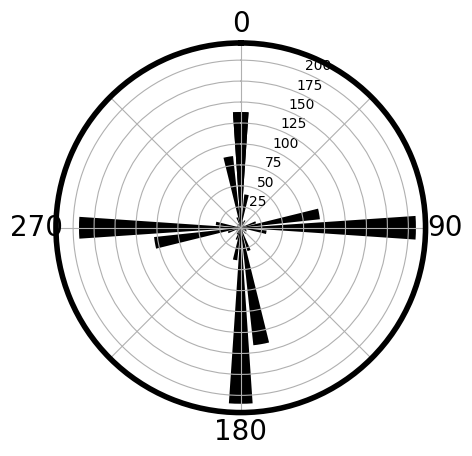

2
[184  23   5   5   5   6   7  22 133 166  33  10  11   8   6   8  19 130
 171  36  10   4   4   4   3  16 126 148  44   9   2   6   5   6  30 116]
1521


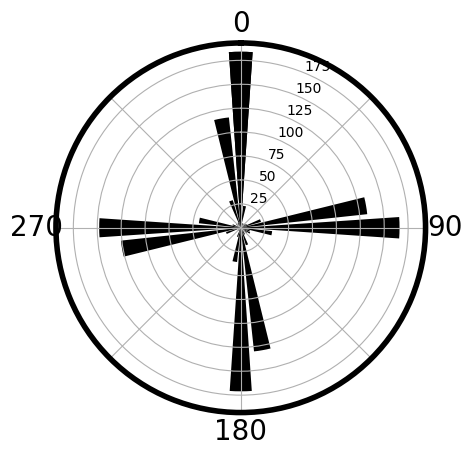

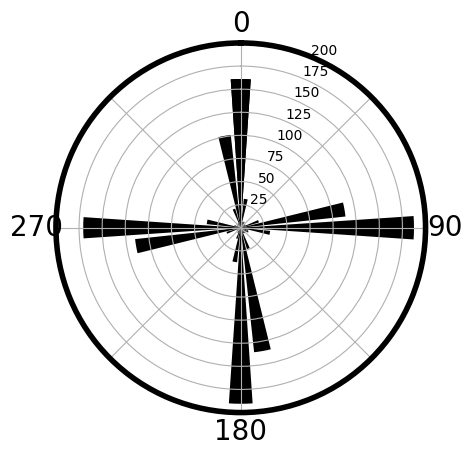

0.22616699539776464
(1.5431568427510576, 0.12279272569905442)
2
[560  44   6   1   1   2   4   3  16  18  10   1   3   3   2   4   5  21
  30  10   3   2   2   1   2   2  15  24   5   1   0   1   3   3   9 307]
1124


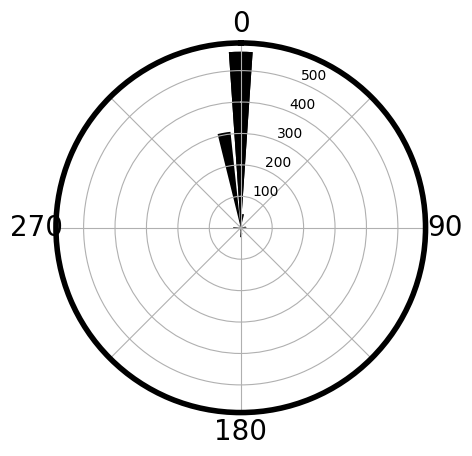

0.8309608540925267
(27.63586324938291, 0.0)
Answer: Nope


In [119]:
###Do single neurons generalize?

day_type='3_task_all'
ref_ses=0

coherence_thr=1-math.cos(math.radians(45)) #i.e. below 45 degrees either side

angles_all=[]
angles_X_all=[]
dual_prop_all=[]
single_prop_all=[]

single_prop_all_X=[]

num_neurons_all=[]
num_neurons_all_XX=[]
mouse_days_used_=[]
mouse_days_used_XX_=[]

use_peak=False

if day_type!='combined_ABCDonly':
    num_states=4
    
day_type_array=np.load(Input_folder+day_type+'_days.npy')

for mouse_recday in day_type_array:
    print(mouse_recday)
    try:
    
        num_sessions=len(np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy'))
        sessions=np.load(Input_folder+'Task_num_'+mouse_recday+'.npy')
        repeat_ses=np.where(rank_repeat(sessions)>0)[0]
        non_repeat_ses=non_repeat_ses_maker(mouse_recday) 

        Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)

        X_all=np.where((np.sum(Tasks==Tasks[0],axis=1)==len(Tasks[0]))==True)[0]

        X_rep=np.intersect1d(X_all,repeat_ses)

        non_ref_ses=np.setdiff1d(non_repeat_ses,ref_ses)

        if use_peak==True:
            Xsession_correlations_day=Xsession_correlations_peaks[mouse_recday]
        else:
            Xsession_correlations_day=Xsession_correlations[day_type]['Angles'][mouse_recday]
        used_boolean=used_boolean_dic[day_type][mouse_recday]
        Xsession_correlations_day_used=Xsession_correlations_day[used_boolean]

        angles_day=Xsession_correlations_day_used[:,ref_ses,non_ref_ses]
        angles_day2=angles_day[:,:2]
        if np.shape(angles_day2)[1]==2:
            angles_all.append(angles_day2) ##only include first 2 comparison sessions (i.e. 3 sessions) 
        ##in some days animals get 4 tasks by accident


            distances_day2=1-np.cos(np.deg2rad(angles_day2))
            max_dist=np.max(distances_day2,axis=1)
            dual_prop=np.sum(max_dist<coherence_thr)/len(max_dist)
            single_prop=np.mean([np.sum(distances_day2[:,0]<coherence_thr)/len(distances_day2),\
                                np.sum(distances_day2[:,1]<coherence_thr)/len(distances_day2)])

            dual_prop_all.append(dual_prop)
            single_prop_all.append(single_prop)

        if len(X_rep)>0:
            mouse_days_used_XX_.append(mouse_recday)
            num_neurons_all_XX.append(np.sum(used_boolean))
            angles_X_day=Xsession_correlations_day_used[:,ref_ses,X_rep[0]]
            angles_X_all.append(angles_X_day)

            distances_day_X=1-np.cos(np.deg2rad(angles_X_day))
            if np.isnan(np.mean(distances_day_X))==False:
                single_prop_X=np.sum(distances_day_X<coherence_thr)/len(distances_day_X)
                single_prop_all_X.append(single_prop_X)

        num_neurons_all.append(np.sum(used_boolean))

        mouse_days_used_.append(mouse_recday)
    except:
        print('not used')

print('Total number of neurons')
print(np.sum(num_neurons_all))

single_neuron_angles_all=np.vstack((angles_all))
single_neuron_angles_X_all=remove_nan(np.hstack((angles_X_all)))

###Fitting gaussian
from scipy.stats import norm
goal_progress_stability=np.nanmean(np.reshape(np.roll(mean_hist_fine,45),(4,90)),axis=0)
phase_angles=((single_neuron_angles_all[:,0]+45)%90)
mu, std = norm.fit(phase_angles)

np.save(Input_folder+'sigma_goalprogress.npy',std) ###this will be used later for clustering permutations

###Plotting histograms
hist_all=[]
hist_all_fine=[]
for session in range(2):
    print(session+1)
    angles_all_hist=np.histogram(single_neuron_angles_all[:,session],np.linspace(0,360,37))[0]
    
    angles_all_hist_fine=np.histogram(single_neuron_angles_all[:,session],np.linspace(0,360,361))[0]
    
    hist_all.append(np.asarray(angles_all_hist))
    hist_all_fine.append(np.asarray(angles_all_hist_fine))

    print(angles_all_hist)
    print(np.sum(angles_all_hist))

    polar_plot_stateX(angles_all_hist,angles_all_hist,angles_all_hist,color='black',labels='angles',plot_type='bar')
    plt.show()

hist_all=np.asarray(hist_all)
hist_all_fine=np.asarray(hist_all_fine)

mean_hist=np.mean(hist_all,axis=0)
polar_plot_stateX(mean_hist,mean_hist,mean_hist,color='black',labels='angles',plot_type='bar')
plt.savefig(Output_folder+'Mean_anglechange_polarplot.svg',\
           bbox_inches = 'tight', pad_inches = 0)
plt.show()

mean_hist_fine=np.mean(hist_all_fine,axis=0)

generalising_num=(np.sum(mean_hist[:5])+np.sum(mean_hist[-4:]))
generalissing_prop=generalising_num/np.sum(mean_hist)
print(generalissing_prop)
print(two_proportions_test(generalising_num, np.sum(mean_hist), np.sum(mean_hist)*(1/num_states),np.sum(mean_hist)))

###X vs X'
print(session+1)
angles_all_hist=np.histogram(single_neuron_angles_X_all,np.linspace(0,360,37))[0]
print(angles_all_hist)
print(np.sum(angles_all_hist))
polar_plot_stateX(angles_all_hist,angles_all_hist,angles_all_hist,color='black',labels='angles',plot_type='bar')
plt.savefig(Output_folder+'Mean_anglechange_XvsX_polarplot.svg',\
           bbox_inches = 'tight', pad_inches = 0)
plt.show()

generalising_num=(np.sum(angles_all_hist[:5])+np.sum(angles_all_hist[-4:]))
generalissing_prop=generalising_num/np.sum(angles_all_hist)
print(generalissing_prop)
print(two_proportions_test(generalising_num, np.sum(angles_all_hist), np.sum(angles_all_hist)*(1/num_states),\
                           np.sum(angles_all_hist)))

single_prop_all=np.asarray(single_prop_all)
dual_prop_all=np.asarray(dual_prop_all)
single_prop_all_X=np.asarray(single_prop_all_X)

print('Answer: Nope')

ab03_01092023
ab03_02092023
ab03_05092023
ab03_06092023
ab03_29082023
ab03_30082023
ah03_12082021
Less than 10 usable neurons - not included
ah03_13082021
Less than 10 usable neurons - not included
ah03_18082021
ah03_19082021
Less than 10 usable neurons - not included
ah04_01122021
ah04_02122021
ah04_05122021
ah04_06122021
ah04_07122021
ah04_08122021
ah04_09122021


C:\Users\moham\AppData\Local\Temp\ipykernel_27740\633530870.py:91: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(angles_X_day))==False:


ah04_10122021
ah04_14122021
ah04_16122021
ah04_26112021
ah04_30112021
ah07_01092023
ah07_02092023
ah07_27082023
ah07_28082023
Not used
ah07_29082023
ah07_30082023
me08_06092021
Less than 10 usable neurons - not included
me08_09092021
Less than 10 usable neurons - not included
me08_10092021
me08_11092021
Less than 3 sessions - not included
me08_12092021
Not used
me08_13092021
me10_08122021
me10_09122021
Less than 10 usable neurons - not included
me10_10122021
Less than 10 usable neurons - not included
me10_14122021
Not used
me10_15122021
Not used
me10_16122021
me10_17122021
Less than 10 usable neurons - not included
me10_19122021
Less than 10 usable neurons - not included
me10_20122021
Less than 3 sessions - not included
me10_21122021
Less than 3 sessions - not included
me11_01122021


C:\Users\moham\AppData\Local\Temp\ipykernel_27740\633530870.py:52: RuntimeWarning: Mean of empty slice
  if np.shape(angles_day2)[1]<2 or np.isnan(np.nanmean(angles_day2))==True:


me11_02122021
me11_05122021
me11_06122021
me11_07122021
me11_08122021
me11_09122021
me11_10122021
me11_12122021
Less than 10 usable neurons - not included
me11_13122021
Less than 10 usable neurons - not included
me11_30112021
1
[3659 1120  369  276  270  261  274  737 2270 2476  881  380  239  212
  273  269  692 2088 2432  851  356  237  211  275  311  797 2318 2478
  923  365  248  210  308  288  806 2988]
33148


C:\Users\moham\AppData\Local\Temp\ipykernel_27740\1144592826.py:206: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=20)


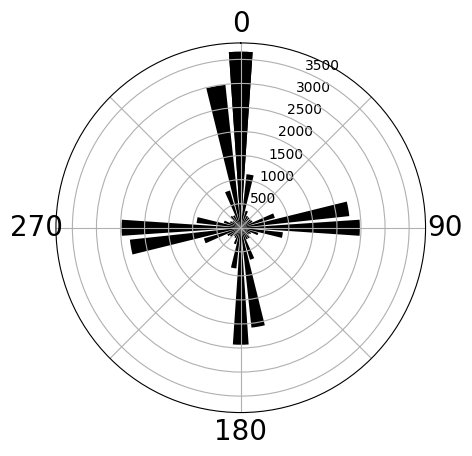

2
[3644 1051  358  172  228  215  346  751 2206 2707 1044  349  205  210
  217  320  817 2047 2455  944  353  247  174  262  361  872 2350 2371
  915  334  256  194  234  359  826 2754]
33148


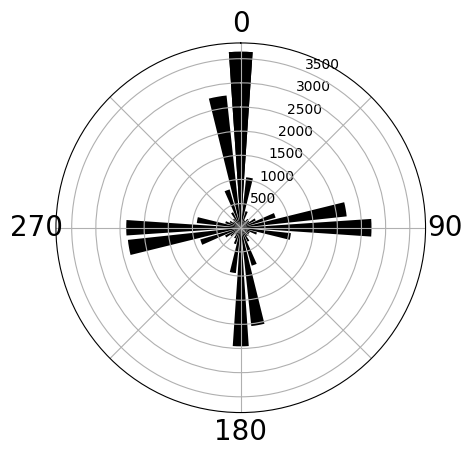


Mean histogram


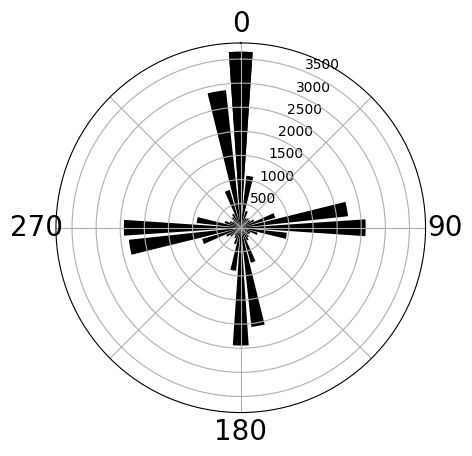

0.2973030047061663
(13.659379012659427, 0.0)
[9055 1045  153   72   46   77   50  116  520  639  253  139   91   49
   71  117  194  789  929  366  125  105   60   74   96  212  542  623
  240   99   61   56   58   96  445 5515]
23178


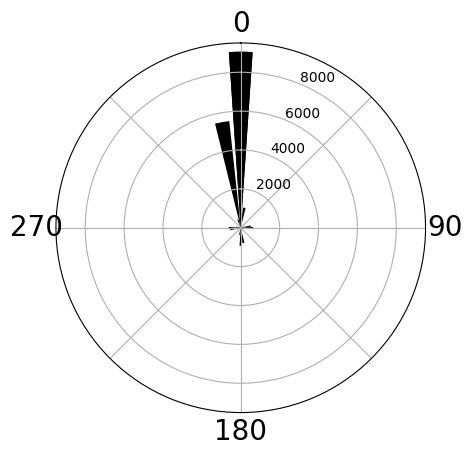

0.7112347916127362
(99.38059624039302, 0.0)
Answer: Yea a little bit


In [41]:
##Do pairs of neurons remain coherent?

Coherence_dic=rec_dd()
coherence_thr=1-math.cos(math.radians(45)) #i.e. below 45 degrees either side (refine to first coherence bin?)
angle_changes=np.linspace(0,360,5)[:-1]

neurons_used_thr=10

day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')

relative_angles_pairs_all=[]
relative_angles_pairs_X_all=[]

ref_ses=0 ##where angles between neurons are taken

excluded_num_sessions=[]
excluded_num_neurons=[]

included_XYZ_only=[]

neurons_used_all_=[]
use_peak=False
if day_type!='combined_ABCDE':
    num_states=4

for mouse_recday in day_type_array:
    print(mouse_recday)
    try:
        num_sessions=len(np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy'))
        sessions=np.load(Input_folder+'Task_num_'+mouse_recday+'.npy')
        repeat_ses=np.where(rank_repeat(sessions)>0)[0]
        non_repeat_ses=non_repeat_ses_maker(mouse_recday)  

        Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
        X_all=np.where((np.sum(Tasks==Tasks[0],axis=1)==len(Tasks[0]))==True)[0]


        X_rep=np.intersect1d(X_all,repeat_ses)
        non_ref_ses=np.setdiff1d(non_repeat_ses,ref_ses)
        if use_peak==True:
            Xsession_correlations_day=Xsession_correlations_peaks[mouse_recday]
        else:
            Xsession_correlations_day=Xsession_correlations[day_type]['Angles'][mouse_recday]
        used_boolean=used_boolean_dic[day_type][mouse_recday]
        neurons_used=np.where(used_boolean==True)[0]
        Xsession_correlations_day_used=Xsession_correlations_day[used_boolean]

        angles_day=Xsession_correlations_day_used[:,ref_ses,non_ref_ses]
        angles_day2=angles_day[:,:2] ##only include first 2 comparison sessions (i.e. 3 sessions) 

        if np.shape(angles_day2)[1]<2 or np.isnan(np.nanmean(angles_day2))==True:
            print('Less than 3 sessions - not included')
            excluded_num_sessions.append(mouse_recday)
            continue

        if len(neurons_used)<neurons_used_thr:
            print('Less than '+str(neurons_used_thr)+' usable neurons - not included')
            excluded_num_neurons.append(mouse_recday)
            continue

        num_trials_ses=[]
        for ses_ind in non_repeat_ses:
            location_=np.load(Input_folder+'Location_'+mouse_recday+'_'+str(ses_ind)+'.npy',allow_pickle=True)
            num_trials_ses.append(len(location_))
        num_trials_ses=np.hstack((num_trials_ses))



        if np.sum(num_trials_ses>0)<3:
            print('Less than 3 tasks with completed trials')
            excluded_num_sessions.append(mouse_recday)
            continue

        relative_angles_pairs_day=[]
        for session in range(2):
            angles_ses=angles_day2[:,session]
            relative_angles_mat_ses=np.vstack(([positive_angle([circular_angle(angles_ses[neuronX],angles_ses[neuronY])\
                         for neuronX in np.arange(len(angles_ses))])\
                        for neuronY in np.arange(len(angles_ses))]))

            relative_angles_pairs_ses=matrix_triangle(relative_angles_mat_ses)
            relative_angles_pairs_day.append(relative_angles_pairs_ses)

        relative_angles_pairs_day=np.asarray(relative_angles_pairs_day).T
        relative_angles_pairs_all.append(relative_angles_pairs_day) 

        if len(X_rep)>0:
            Coherence_dic['Num_neurons_used_XYZX'][mouse_recday]=len(neurons_used)
            angles_X_day=Xsession_correlations_day_used[:,ref_ses,X_rep[0]]
            if np.isnan(np.nanmean(angles_X_day))==False:
                relative_angles_mat_X_day_=np.vstack(([positive_angle([circular_angle(angles_X_day[neuronX],\
                                                                                     angles_X_day[neuronY])\
                             for neuronX in np.arange(len(angles_X_day))])\
                            for neuronY in np.arange(len(angles_X_day))]))
                relative_angles_mat_X_day=matrix_triangle(relative_angles_mat_X_day_)
                relative_angles_pairs_X_all.append(relative_angles_mat_X_day)

        else:
            included_XYZ_only.append(mouse_recday)

        ###### coherence proportion
        pairXY=relative_angles_pairs_day[:,0]
        pairXZ=relative_angles_pairs_day[:,1]
        cosine_distXY=1-np.cos(np.deg2rad(pairXY))
        cosine_distXZ=1-np.cos(np.deg2rad(pairXZ))

        cosine_max=np.max((cosine_distXY,cosine_distXZ),axis=0)
        cosine_mean=np.mean((cosine_distXY,cosine_distXZ),axis=0)
        distance_used_pairs=cosine_max

        coherent_prop=len(np.where(distance_used_pairs<coherence_thr)[0])/len(distance_used_pairs)

        ##breakdown by tuning distance
        angles_between_neurons_used=Xneuron_correlations[day_type]['Angles'][mouse_recday]\
                                             [neurons_used][:,neurons_used][:,:,ref_ses]

        angle_all_all=matrix_triangle(angles_between_neurons_used)
        Tuning_dist=1-np.cos(np.deg2rad(angle_all_all))
        coherence_tuning_prop_all=np.zeros(len(angle_changes))
        tunings=angle_changes/2 ##because taking absolute angle/distance (i.e. maximum angle difference is 180 degrees)
        for tuning_ind,tuning in enumerate(tunings):
            lower_limit=1-math.cos(math.radians(tuning))
            upper_limit=1-math.cos(math.radians(tuning+45))

            coherence_tuning=distance_used_pairs[np.logical_and(Tuning_dist>=lower_limit,Tuning_dist<upper_limit)]
            if len(coherence_tuning)>0:
                coherence_tuning_prop=len(np.where(coherence_tuning<coherence_thr)[0])/len(coherence_tuning)
            else:
                coherence_tuning_prop=np.nan

            coherence_tuning_prop_all[tuning_ind]=coherence_tuning_prop

        Coherence_dic['coherent_prop'][mouse_recday]=coherent_prop
        Coherence_dic['coherent_tuning_prop'][mouse_recday]=coherence_tuning_prop_all
        Coherence_dic['Num_neurons_used'][mouse_recday]=len(neurons_used)
    except:
        print('Not used')

        
relative_angles_pairs_all=np.vstack((relative_angles_pairs_all))
relative_angles_pairs_X_all=remove_nan(np.hstack((relative_angles_pairs_X_all)))

###Plotting histograms
hist_all=[]
for comparison in range(2):
    print(comparison+1)
    session=comparison+1
    relative_angles_all_hist=np.histogram(relative_angles_pairs_all[:,comparison],np.linspace(0,360,37))[0]
    
    hist_all.append(np.asarray(relative_angles_all_hist))
    print(relative_angles_all_hist)
    print(np.sum(relative_angles_all_hist))

    polar_plot_stateX(relative_angles_all_hist,relative_angles_all_hist,relative_angles_all_hist,\
                      color='black',labels='angles',plot_type='bar')
    plt.show()

print('')
print('Mean histogram')
hist_all=np.asarray(hist_all)

mean_hist=np.mean(hist_all,axis=0)
polar_plot_stateX(mean_hist,mean_hist,mean_hist,color='black',labels='angles',plot_type='bar')
plt.savefig(Output_folder+'Mean_relative_anglechange_polarplot.svg',\
           bbox_inches = 'tight', pad_inches = 0)
plt.show()

generalising_num=(np.sum(mean_hist[:5])+np.sum(mean_hist[-4:]))
generalissing_prop=generalising_num/np.sum(mean_hist)
print(generalissing_prop)
print(two_proportions_test(generalising_num, np.sum(mean_hist), np.sum(mean_hist)*(1/num_states),\
                           np.sum(mean_hist)))


relative_angles_all_X_hist=np.histogram(relative_angles_pairs_X_all,np.linspace(0,360,37))[0]
print(relative_angles_all_X_hist)
print(np.sum(relative_angles_all_X_hist))

polar_plot_stateX(relative_angles_all_X_hist,relative_angles_all_X_hist,relative_angles_all_X_hist,\
                  color='black',labels='angles',plot_type='bar')
plt.savefig(Output_folder+'Mean_relative_anglechange_XvsX_polarplot.svg',\
           bbox_inches = 'tight', pad_inches = 0)
plt.show()

generalising_num=(np.sum(relative_angles_all_X_hist[:5])+np.sum(relative_angles_all_X_hist[-4:]))
generalissing_prop=generalising_num/np.sum(relative_angles_all_X_hist)
print(generalissing_prop)
print(two_proportions_test(generalising_num, np.sum(relative_angles_all_X_hist),\
                           np.sum(relative_angles_all_X_hist)*(1/num_states),\
                           np.sum(relative_angles_all_X_hist)))


print('Answer: Yea a little bit')


In [42]:
##printing exclusions
print('Days excluded because less than 3 sessions: '+str(len(excluded_num_sessions)))
print(excluded_num_sessions)
print('Days excluded because less than '+str(neurons_used_thr)+' neurons: '+str(len(excluded_num_neurons)))
print(excluded_num_neurons)

Days excluded because less than 3 sessions: 3
['me08_11092021', 'me10_20122021', 'me10_21122021']
Days excluded because less than 10 neurons: 11
['ah03_12082021', 'ah03_13082021', 'ah03_19082021', 'me08_06092021', 'me08_09092021', 'me10_09122021', 'me10_10122021', 'me10_17122021', 'me10_19122021', 'me11_12122021', 'me11_13122021']


In [44]:
mouse_daysnotused_=[]
mice_used=[]
for mouse_recday in np.load(Input_folder+'3_task_all_days.npy'):
    print(mouse_recday)
    mouse=mouse_recday.split('_',1)[0]
    mice_used.append(mouse)
    if mouse_recday in Coherence_dic['coherent_tuning_prop'].keys():
        coh_tuning_=Coherence_dic['coherent_tuning_prop'][mouse_recday]
        neurons_used_=Coherence_dic['Num_neurons_used'][mouse_recday]
        print(neurons_used_)
        print(coh_tuning_)
    else:
        mouse_daysnotused_.append(mouse_recday)
        print('Not analysed')
        
mice_used=np.unique(np.hstack((mice_used)))

ab03_01092023
51
[0.07942974 0.03743316 0.05019305 0.07692308]
ab03_02092023
51
[0.13513514 0.11188811 0.11797753 0.08707124]
ab03_05092023
37
[0.11914894 0.11764706 0.08176101 0.152     ]
ab03_06092023
37
[0.08571429 0.04255319 0.05479452 0.06944444]
ab03_29082023
52
[0.21374046 0.12539185 0.13609467 0.10798122]
ab03_30082023
52
[0.09750567 0.07874016 0.06413994 0.04      ]
ah03_12082021
Not analysed
ah03_13082021
Not analysed
ah03_18082021
28
[0.11594203 0.08139535 0.13186813 0.07272727]
ah03_19082021
Not analysed
ah04_01122021
49
[0.11260054 0.10132159 0.10135135 0.13274336]
ah04_02122021
49
[0.13076923 0.08658009 0.07936508 0.1       ]
ah04_05122021
61
[0.10995542 0.08219178 0.10948905 0.07761194]
ah04_06122021
46
[0.08645533 0.06024096 0.09090909 0.0647482 ]
ah04_07122021
14
[0.13333333 0.05882353 0.14285714 0.        ]
ah04_08122021
14
[0.15151515 0.06666667 0.04761905 0.05      ]
ah04_09122021
35
[0.05291005 0.10185185 0.05208333 0.03296703]
ah04_10122021
40
[0.23790323 0.208333

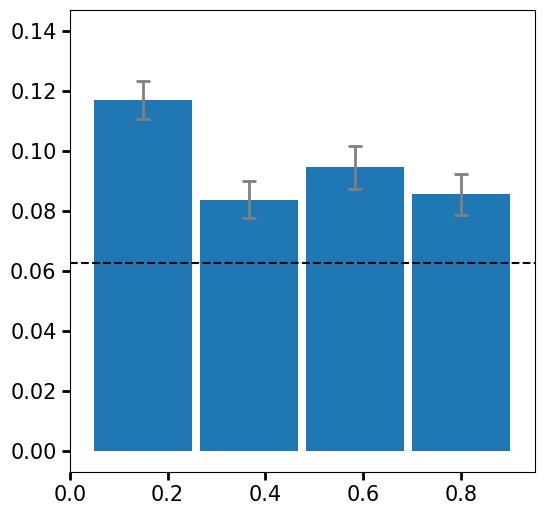

0.09516549349091795
0.0625
37
[8.4324638  3.43961372 4.4431689  3.3921624 ]
(array([ True,  True,  True,  True]), array([1.91838486e-09, 2.97636054e-03, 2.43540341e-04, 2.97636054e-03]), 0.012741455098566168, 0.0125)


In [47]:
###Plotting coherence proportion as function of task distance
from statsmodels.sandbox.stats.multicomp import multipletests
chance_coh=1/4**2
chance_coh2=(((1/4**2)*3+(1/3*1/4)))/4 ##i.e. taking into account non-uniformityies in single neuron rotations


figname=Output_folder+'coherence_proportion_vs_tuningdistance.svg'
coh_tuning_all=dict_to_array(Coherence_dic['coherent_tuning_prop']).T
neurons_used_all=dict_to_array(Coherence_dic['Num_neurons_used'])
coh_tuning_all=coh_tuning_all

bar_plotX(coh_tuning_all,'none',0,0.14,'nopoints','paired',0.025)
plt.axhline(chance_coh,color='black',ls='dashed')
plt.tick_params(axis='both',  labelsize=15)
plt.tick_params(width=2, length=6)
plt.savefig(figname)

plt.show()
print(np.nanmean(coh_tuning_all))
print(chance_coh)
print(len(coh_tuning_all.T))


ttests_ps=np.asarray([st.ttest_1samp(remove_nan(coh_tuning_all[ii]),1/16)[1] for ii in range(len(coh_tuning_all))])
ttests_stat=np.asarray([st.ttest_1samp(remove_nan(coh_tuning_all[ii]),1/16)[0] for ii in range(len(coh_tuning_all))])
print(ttests_stat)
print(multipletests(ttests_ps,alpha=0.05))

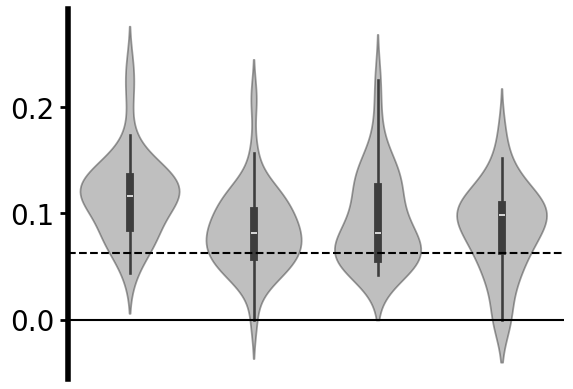

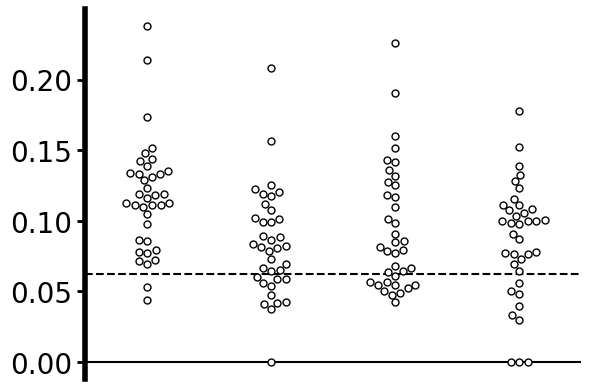

In [48]:
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

data=coh_tuning_all.T
# Filter data using np.isnan
mask = ~np.isnan(data)
filtered_data = [d[m] for d, m in zip(data.T, mask.T)]

#sns.swarmplot(filtered_data, color='white',edgecolor='black',linewidth=1)
#plt.errorbar(np.arange(len(means)),means, yerr=sems, marker='o', fmt='.',color='black')

sns.violinplot(filtered_data, color='grey',alpha=0.5)
#sns.stripplot(filtered_data,color='white',edgecolor='black',linewidth=1,alpha=0.5)
plt.axhline(0,color='black')
plt.axhline(chance_coh,color='black',ls='dashed')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(Output_folder+'/Coherence_tuning_violin.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

sns.swarmplot(filtered_data, color='white',edgecolor='black',linewidth=1)
plt.axhline(0,color='black')
plt.axhline(chance_coh,color='black',ls='dashed')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(Output_folder+'/Coherence_tuning_swarm.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
####Clustering

In [49]:
###Embedding
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

coherence_thr=1-math.cos(math.radians(45)) #i.e. below 45 degrees either side (refine to first coherence bin?)
angle_changes=np.linspace(0,360,5)[:-1]

module_dic=rec_dd()
plot_=False
num_components=2
day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')

use_peak=False
relative_angles_pairs_all=[]


ref_ses=0 ##where angles between neurons are taken
for mouse_recday in day_type_array:
    print(mouse_recday)
    
    if mouse_recday not in Coherence_dic['coherent_tuning_prop'].keys():
        print('Day excluded from pairwise analysis so exluded here too')
        continue

    num_sessions=len(np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy'))
    sessions=np.load(Input_folder+'Task_num_'+mouse_recday+'.npy')
    repeat_ses=np.where(rank_repeat(sessions)>0)[0]
    non_repeat_ses=non_repeat_ses_maker(mouse_recday)  

    non_ref_ses=np.setdiff1d(non_repeat_ses,ref_ses)
    
    if use_peak==True:
        Xsession_correlations_day=Xsession_correlations_peaks[mouse_recday]
    else:
        Xsession_correlations_day=Xsession_correlations[day_type]['Angles'][mouse_recday]
    used_boolean=used_boolean_dic[day_type][mouse_recday]
    neurons_used=np.where(used_boolean==True)[0]
    Xsession_correlations_day_used=Xsession_correlations_day[used_boolean]

    angles_day=Xsession_correlations_day_used[:,ref_ses,non_ref_ses]
    angles_dayX=angles_day[:,:2] ##only include first 2 comparison sessions (i.e. 3 sessions) 



    relative_angles_mat_day=[]
    for session in range(2):
        angles_ses=angles_dayX[:,session]
        relative_angles_mat_ses=np.vstack(([positive_angle([circular_angle(angles_ses[neuronX],angles_ses[neuronY])\
                     for neuronX in np.arange(len(angles_ses))])\
                    for neuronY in np.arange(len(angles_ses))]))
        relative_angles_mat_day.append(relative_angles_mat_ses)

    relative_angles_mat_day=np.asarray(relative_angles_mat_day)        

    distances_mat_day=1-np.cos(np.deg2rad(relative_angles_mat_day))
    distances_mat_day_max=np.max(distances_mat_day,axis=0)

    distance_matrix_used=distances_mat_day_max

    #MDS
    embedding = MDS(n_components=num_components,dissimilarity='precomputed')
    X_transformed = embedding.fit_transform(distance_matrix_used)

    #tSNE
    if num_components==1:
        constant=20
    else:
        constant=0

    perp_=5*10**(2-num_components)+constant
    if perp_>=len(distance_matrix_used):
        print('Perplexity not less than number of samples')
        continue

    embedding_TSNE=TSNE(n_components=num_components, init='random',metric='precomputed',\
                        perplexity=perp_)
    X_transformed_TSNE = embedding_TSNE.fit_transform(distance_matrix_used)

    if plot_==True:
        if num_components==2:
            print(X_transformed.shape)
            print('MDS')
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.scatter(X_transformed[:,0],X_transformed[:,1],s=5)
            plt.show()

            print('tSNE')
            plt.scatter(X_transformed_TSNE[:,0],X_transformed_TSNE[:,1],s=5)
            plt.show()
            print(embedding_TSNE.kl_divergence_)
            print('')
            print('')

    module_dic[num_components]['distance_matrix_used'][mouse_recday]=distance_matrix_used
    module_dic[num_components]['MDS'][mouse_recday]=X_transformed
    module_dic[num_components]['tSNE'][mouse_recday]=X_transformed_TSNE
    module_dic[num_components]['tSNE_KL_divergence'][mouse_recday]=embedding_TSNE.kl_divergence_
    module_dic[num_components]['perplexity_used_tSNE'][mouse_recday]=perp_


ab03_01092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_02092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_05092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_06092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_29082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_30082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah03_12082021
Day excluded from pairwise analysis so exluded here too
ah03_13082021
Day excluded from pairwise analysis so exluded here too
ah03_18082021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah03_19082021
Day excluded from pairwise analysis so exluded here too
ah04_01122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_02122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_05122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_06122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_07122021
ah04_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_09122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_10122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_14122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_16122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_26112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah04_30112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah07_01092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah07_02092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah07_27082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah07_28082023
Day excluded from pairwise analysis so exluded here too
ah07_29082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ah07_30082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me08_06092021
Day excluded from pairwise analysis so exluded here too
me08_09092021
Day excluded from pairwise analysis so exluded here too
me08_10092021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me08_11092021
Day excluded from pairwise analysis so exluded here too
me08_12092021
Day excluded from pairwise analysis so exluded here too
me08_13092021
me10_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me10_09122021
Day excluded from pairwise analysis so exluded here too
me10_10122021
Day excluded from pairwise analysis so exluded here too
me10_14122021
Day excluded from pairwise analysis so exluded here too
me10_15122021
Day excluded from pairwise analysis so exluded here too
me10_16122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me10_17122021
Day excluded from pairwise analysis so exluded here too
me10_19122021
Day excluded from pairwise analysis so exluded here too
me10_20122021
Day excluded from pairwise analysis so exluded here too
me10_21122021
Day excluded from pairwise analysis so exluded here too
me11_01122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_02122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_05122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_06122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_07122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_09122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_10122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_12122021
Day excluded from pairwise analysis so exluded here too
me11_13122021
Day excluded from pairwise analysis so exluded here too
me11_30112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ab03_01092023


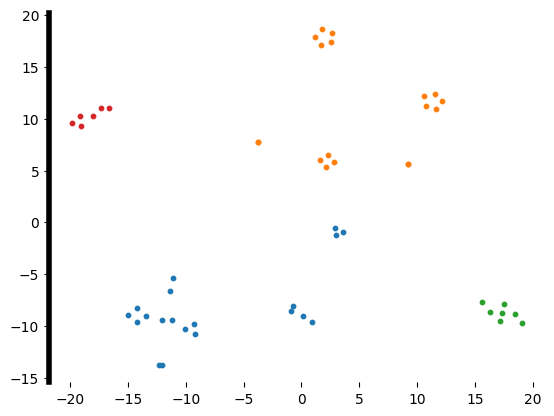

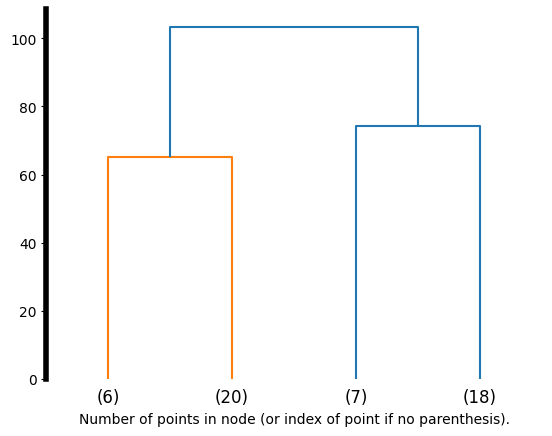

0.6075351
ab03_02092023


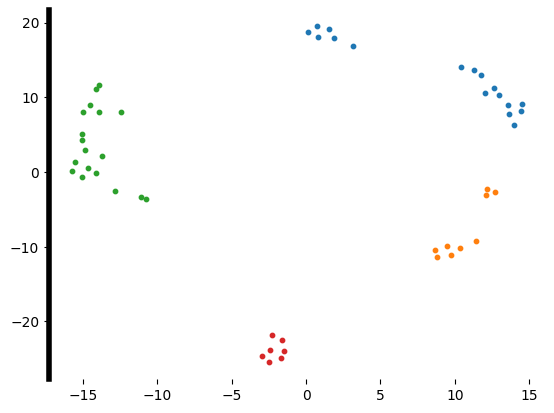

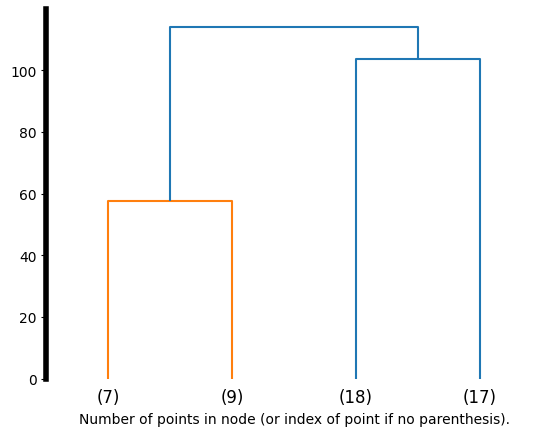

0.7044857
ab03_05092023


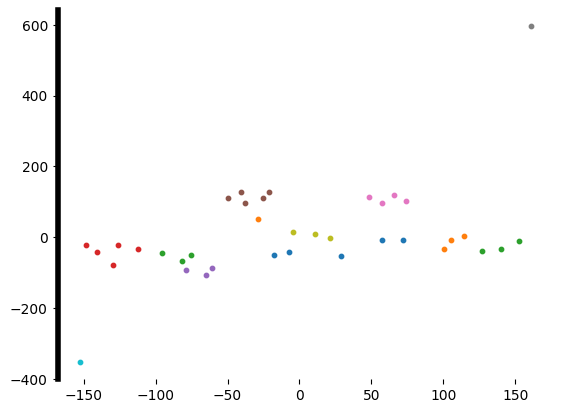

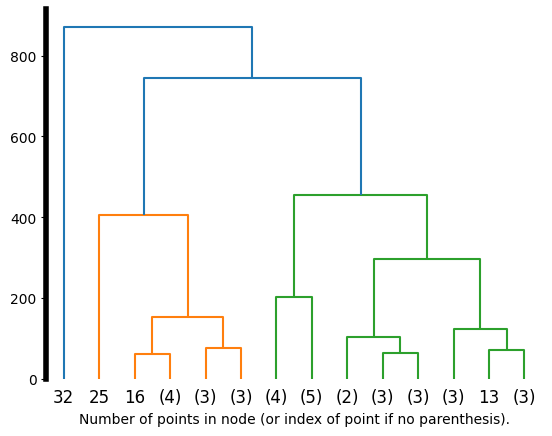

0.4650611
ab03_06092023


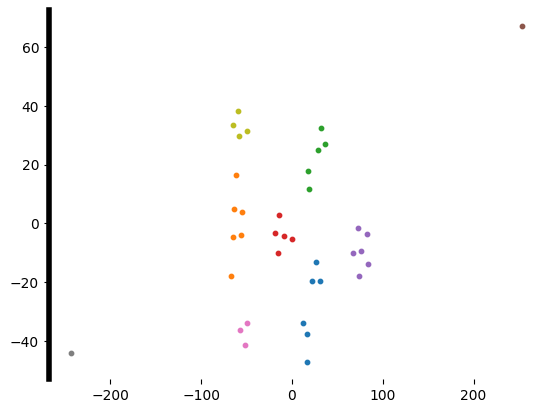

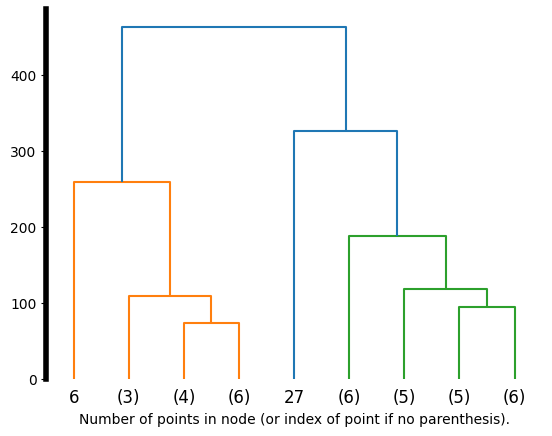

0.6048379
ab03_29082023


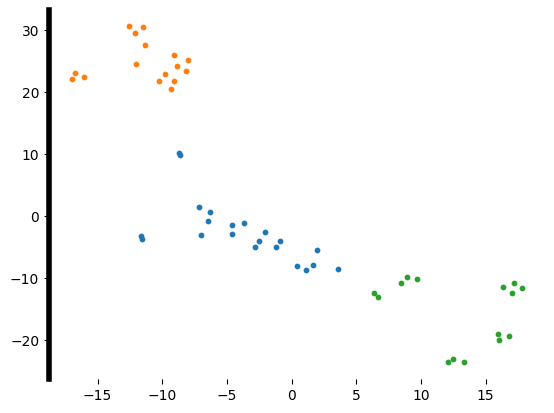

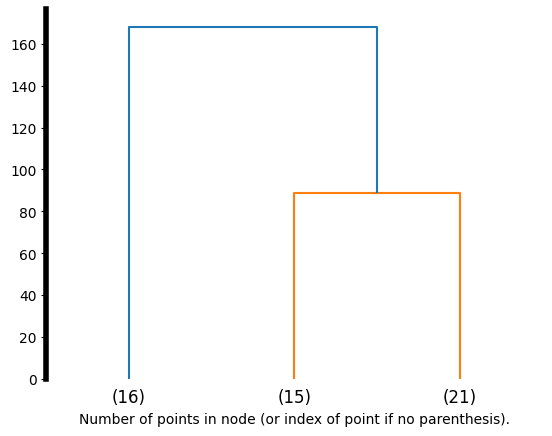

0.64283437
ab03_30082023


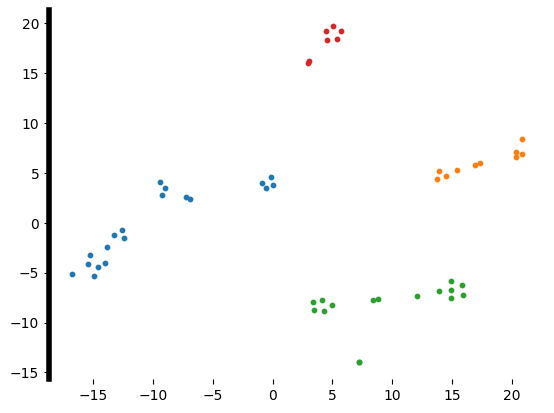

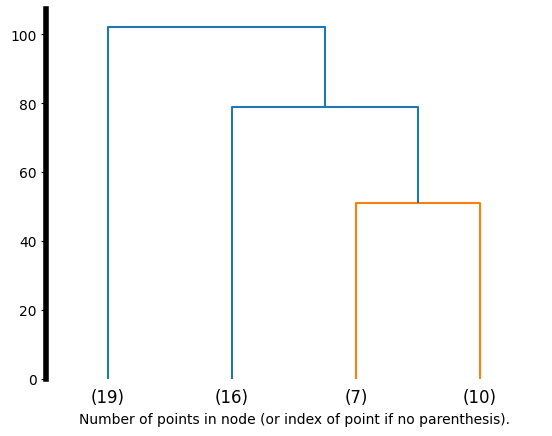

0.6614055
ah03_12082021
Day excluded from pairwise analysis so exluded here too
ah03_13082021
Day excluded from pairwise analysis so exluded here too
ah03_18082021


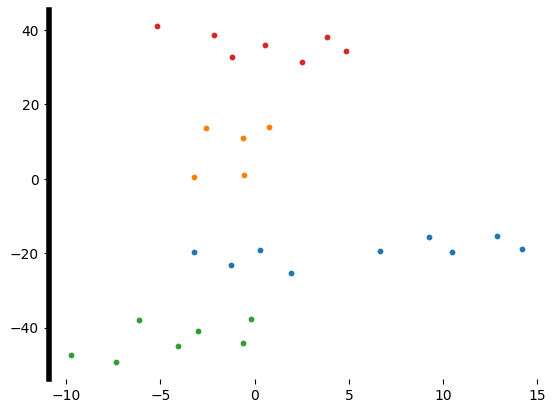

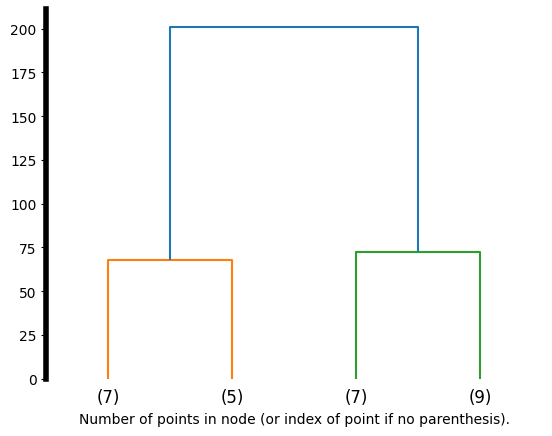

0.6826802
ah03_19082021
Day excluded from pairwise analysis so exluded here too
ah04_01122021


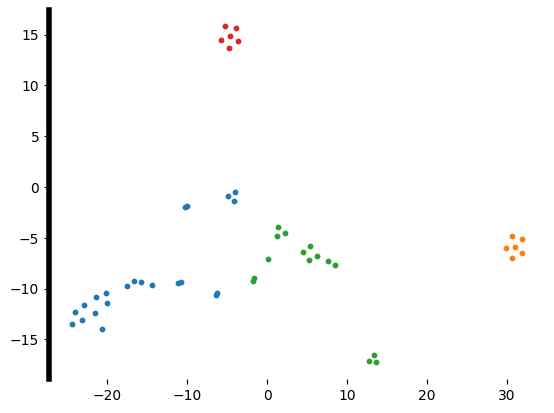

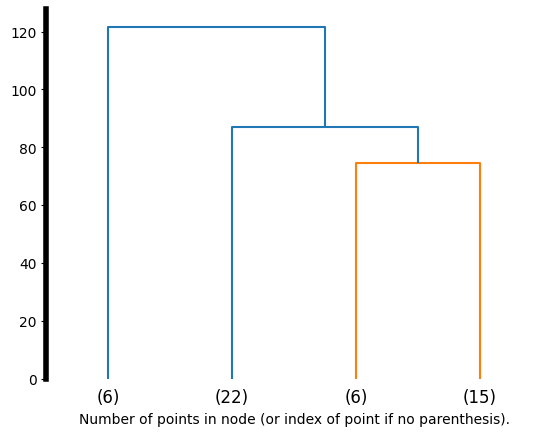

0.61198556
ah04_02122021


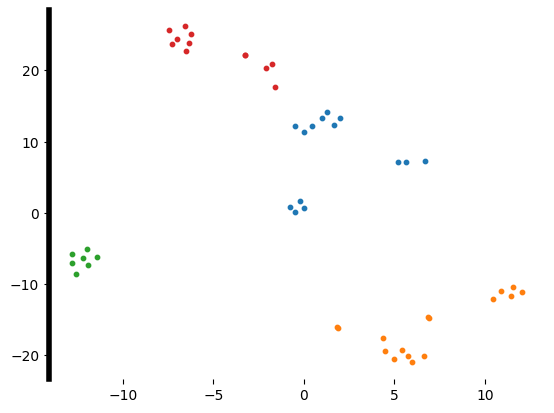

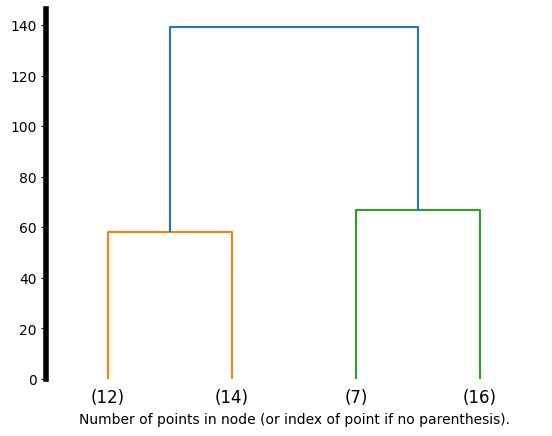

0.67911446
ah04_05122021


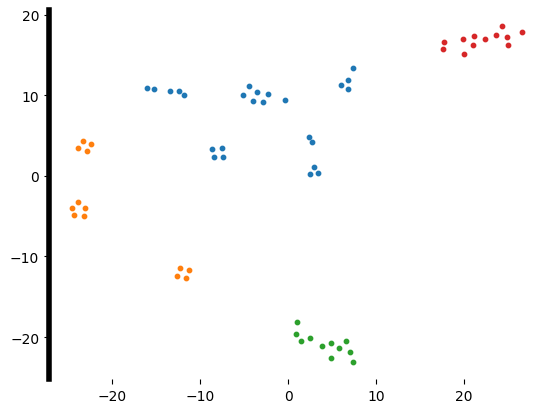

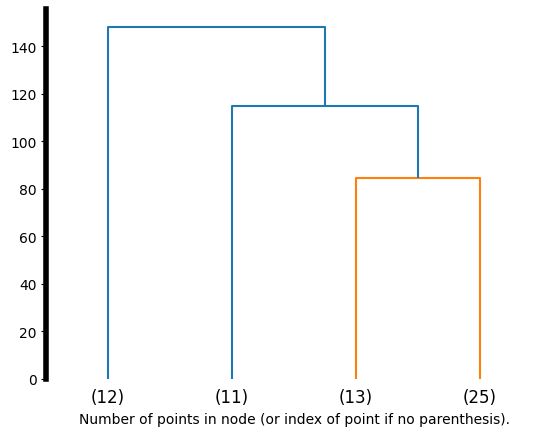

0.6171416
ah04_06122021


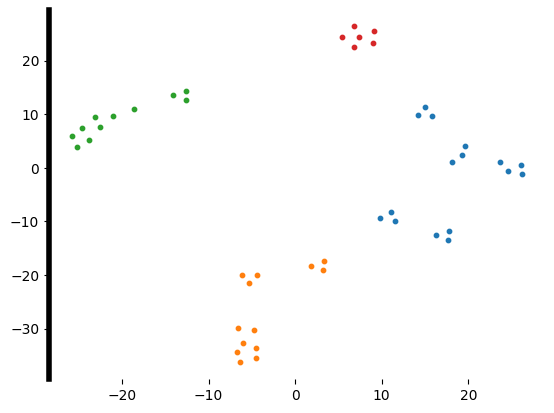

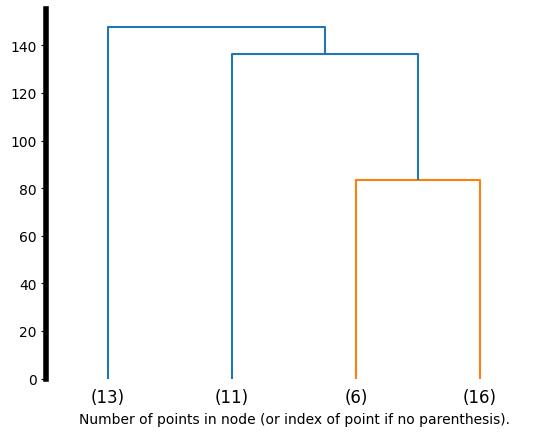

0.6490286
ah04_07122021


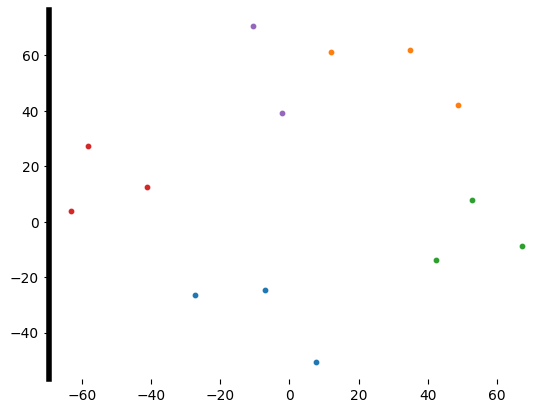

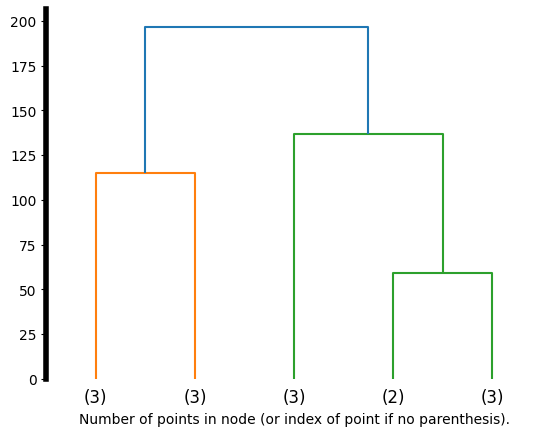

0.43717006
ah04_08122021


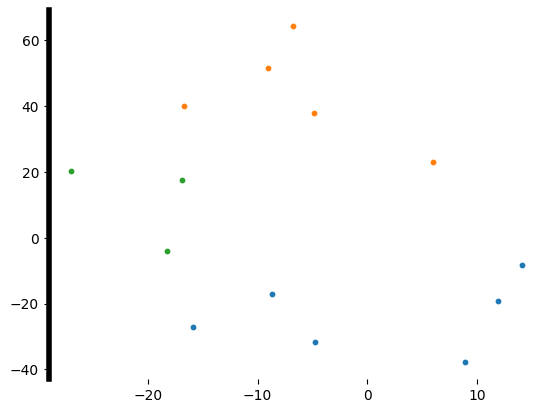

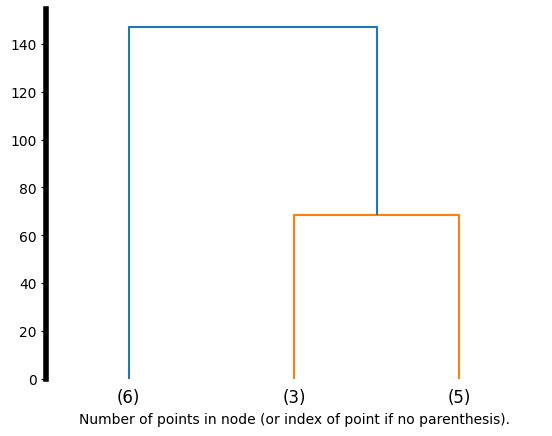

0.41935244
ah04_09122021


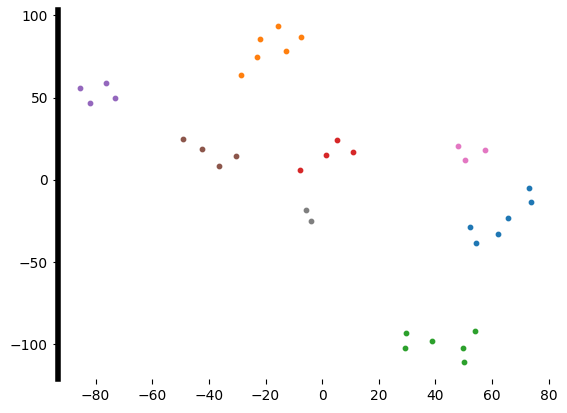

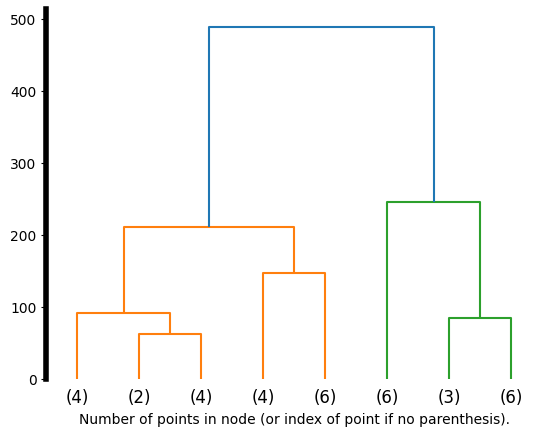

0.69582695
ah04_10122021


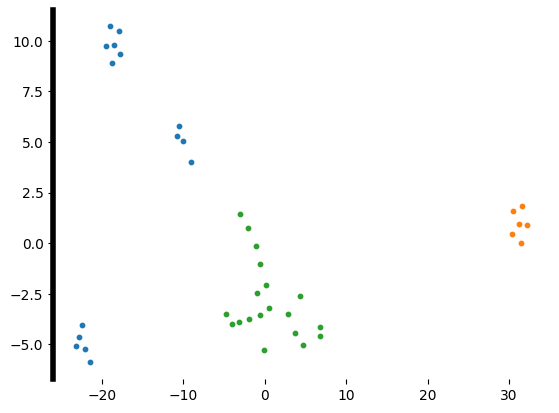

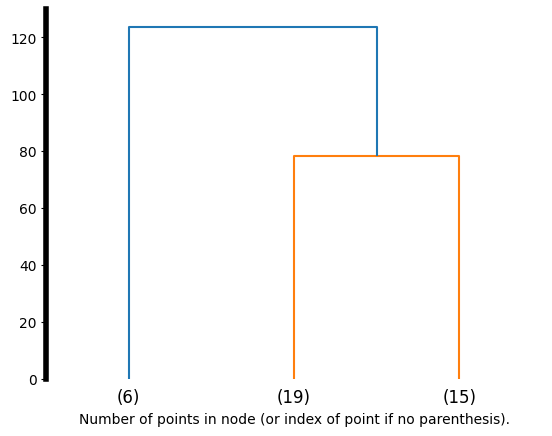

0.6787303
ah04_14122021


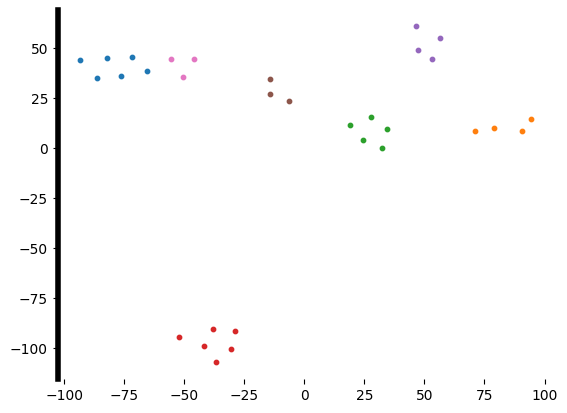

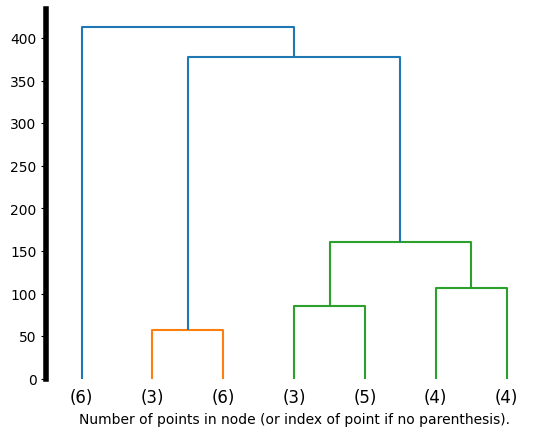

0.69867873
ah04_16122021


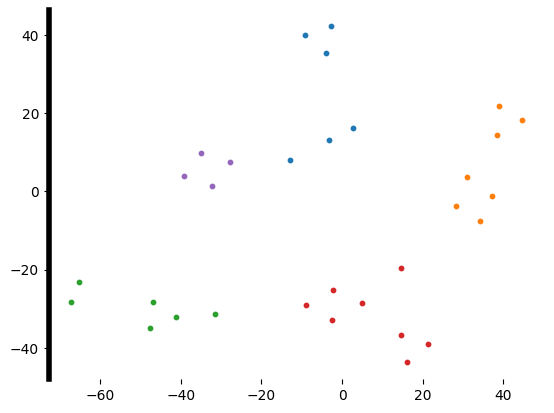

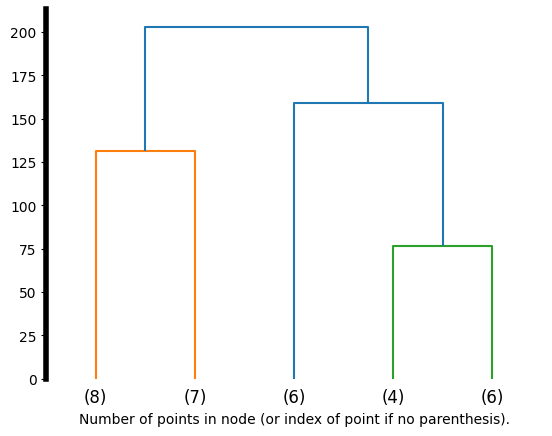

0.58073264
ah04_26112021


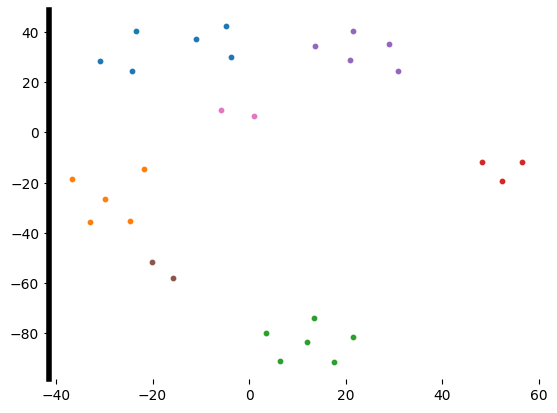

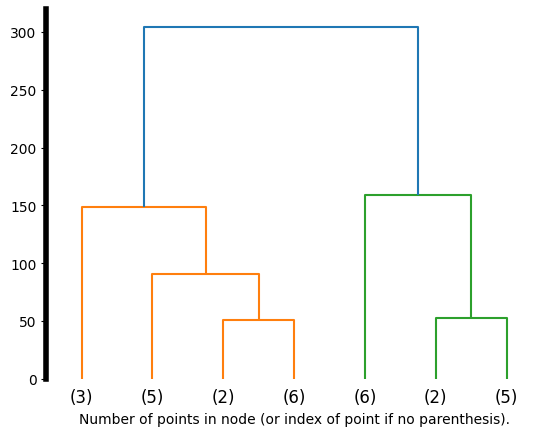

0.60831374
ah04_30112021


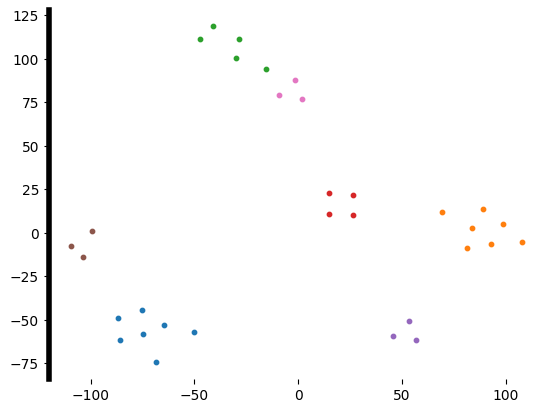

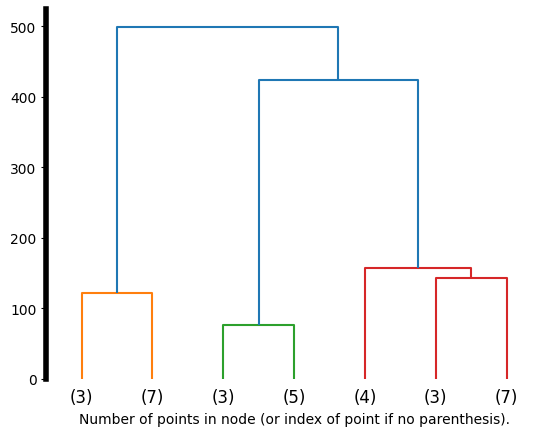

0.6701416
ah07_01092023


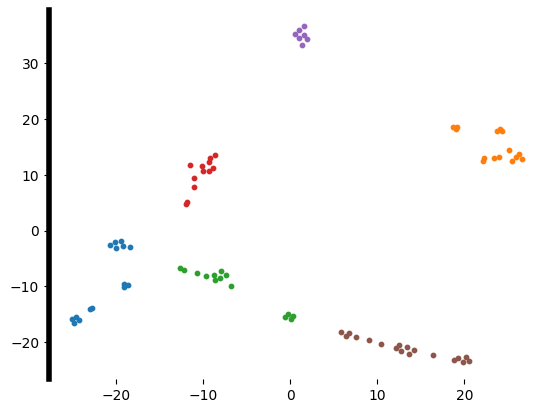

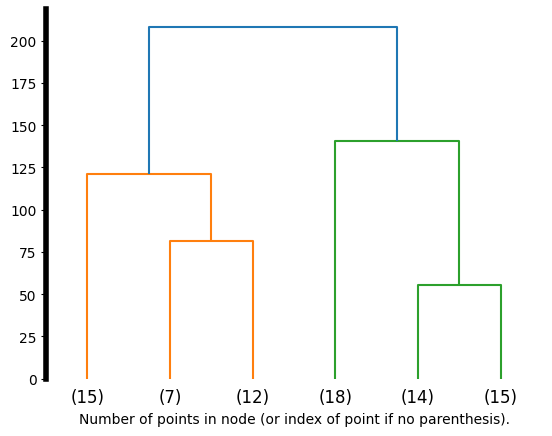

0.69901866
ah07_02092023


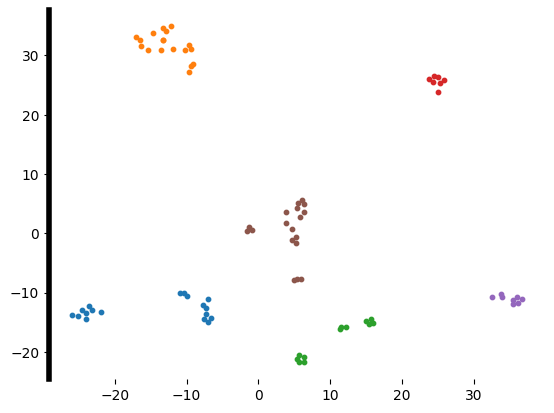

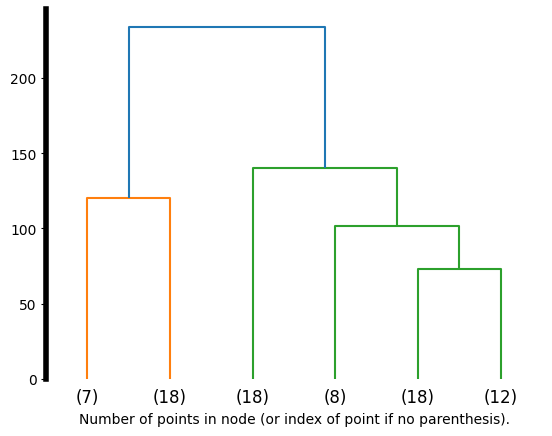

0.7439164
ah07_27082023


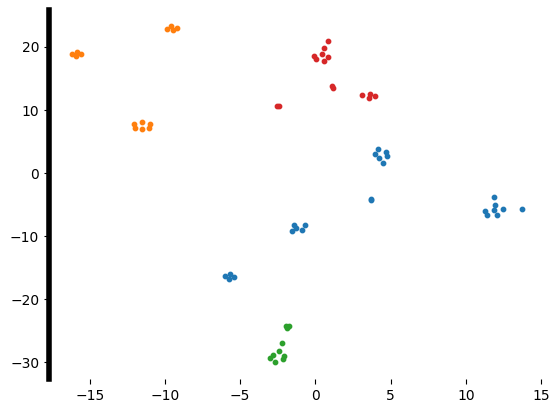

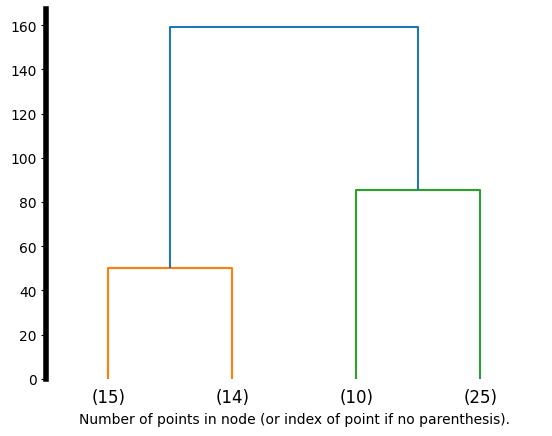

0.5080588
ah07_28082023
Day excluded from pairwise analysis so exluded here too
ah07_29082023


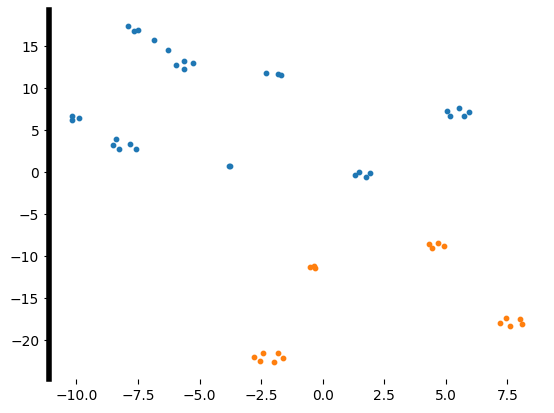

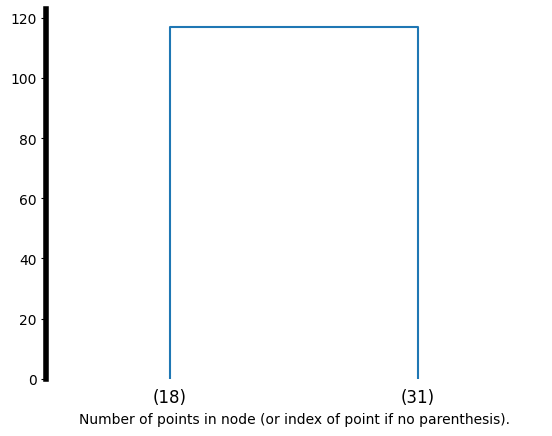

0.6096687
ah07_30082023


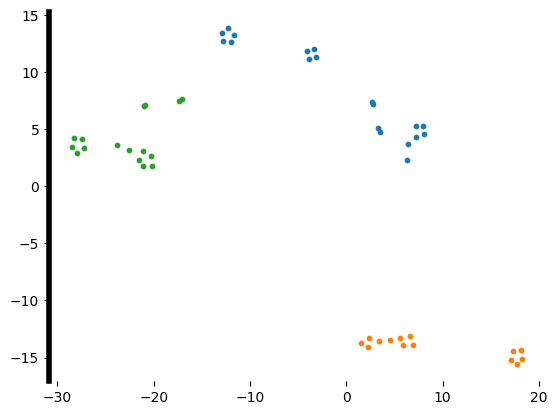

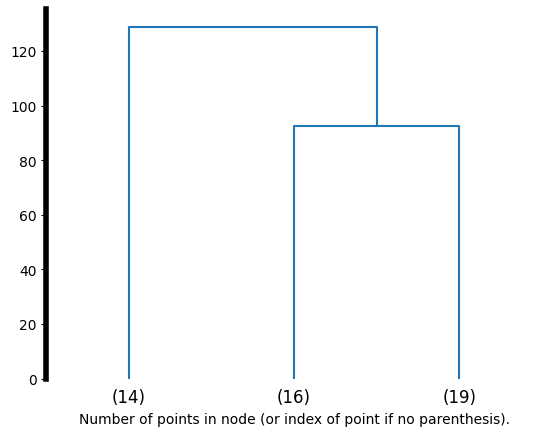

0.6094824
me08_06092021
Day excluded from pairwise analysis so exluded here too
me08_09092021
Day excluded from pairwise analysis so exluded here too
me08_10092021


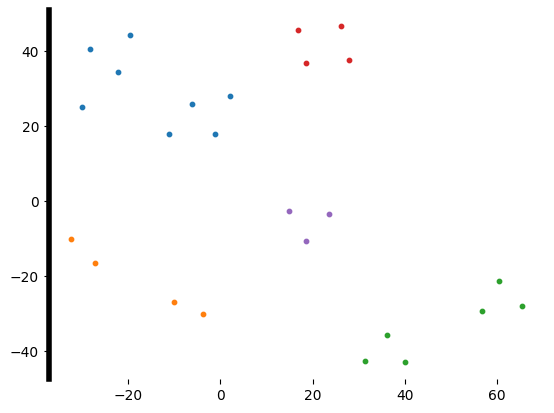

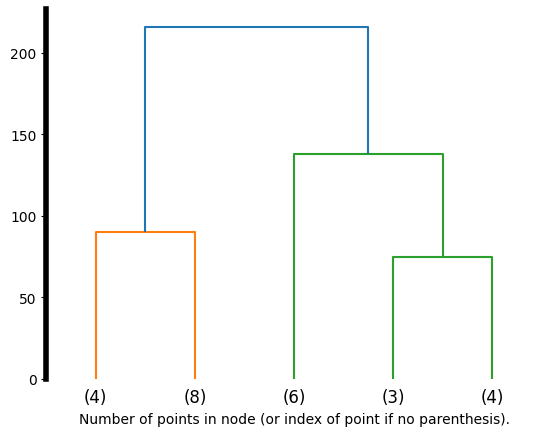

0.5550369
me08_11092021
Day excluded from pairwise analysis so exluded here too
me08_12092021
Day excluded from pairwise analysis so exluded here too
me08_13092021


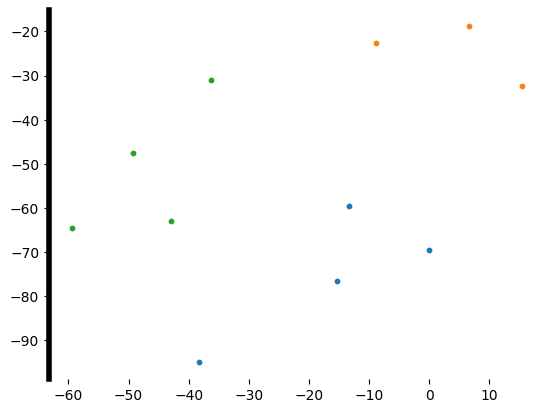

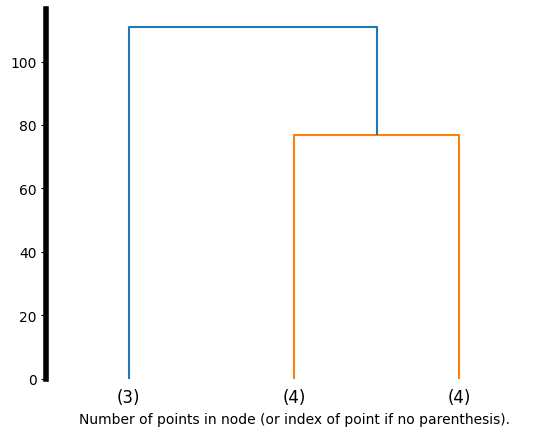

0.45036557
me10_08122021


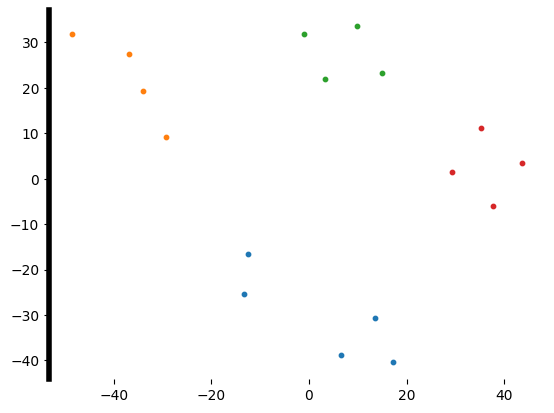

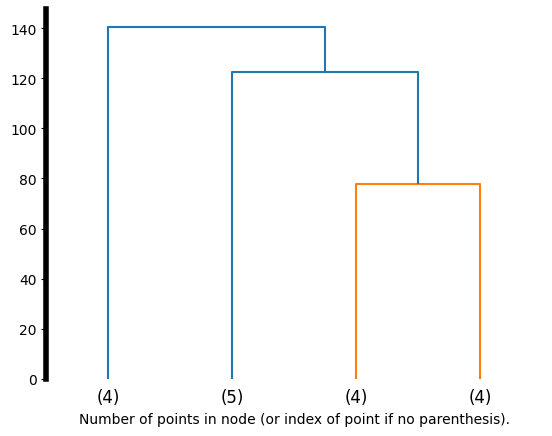

0.61490476
me10_09122021
Day excluded from pairwise analysis so exluded here too
me10_10122021
Day excluded from pairwise analysis so exluded here too
me10_14122021
Day excluded from pairwise analysis so exluded here too
me10_15122021
Day excluded from pairwise analysis so exluded here too
me10_16122021


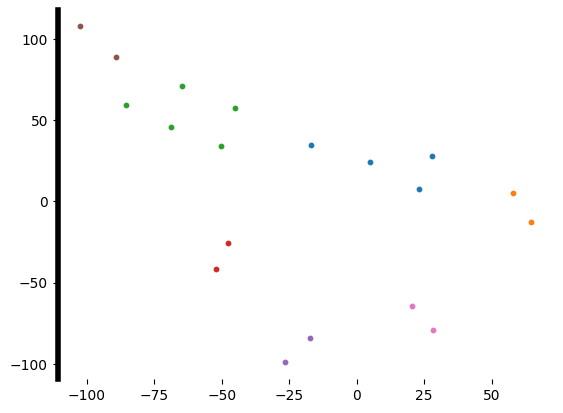

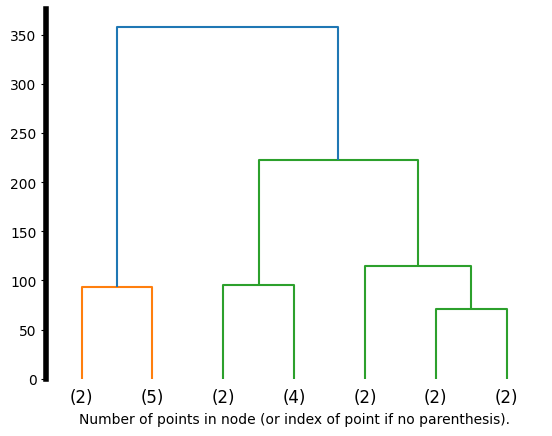

0.5397823
me10_17122021
Day excluded from pairwise analysis so exluded here too
me10_19122021
Day excluded from pairwise analysis so exluded here too
me10_20122021
Day excluded from pairwise analysis so exluded here too
me10_21122021
Day excluded from pairwise analysis so exluded here too
me11_01122021


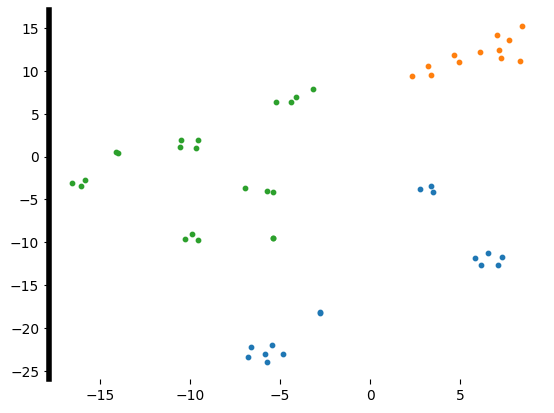

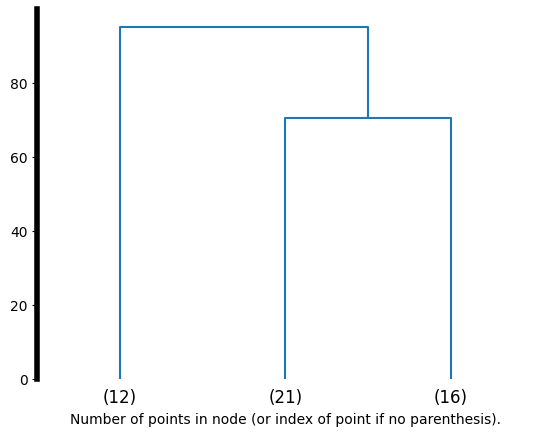

0.50594723
me11_02122021


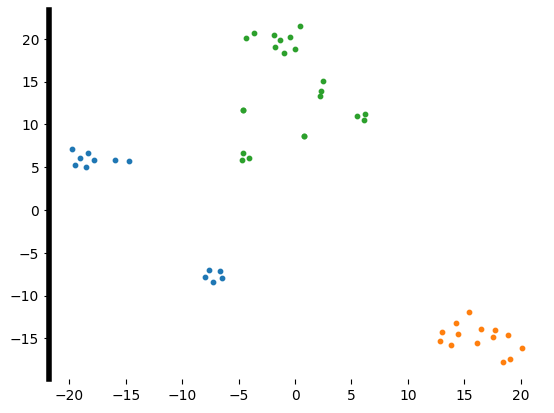

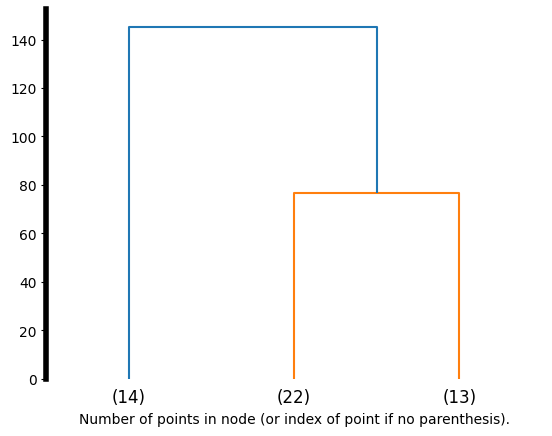

0.6642946
me11_05122021


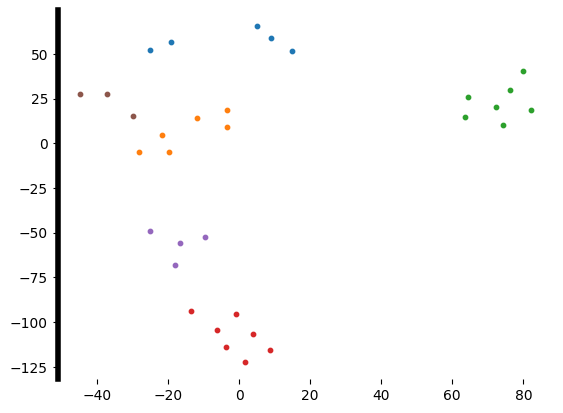

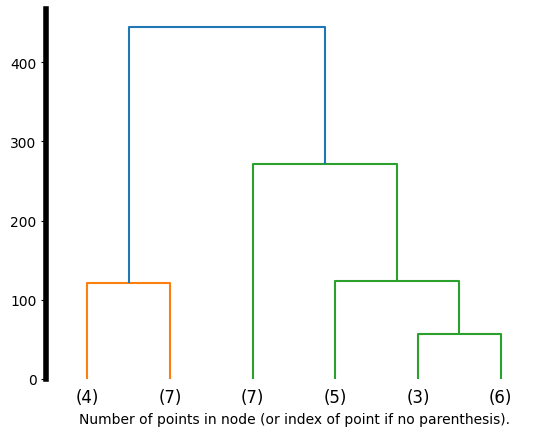

0.6116041
me11_06122021


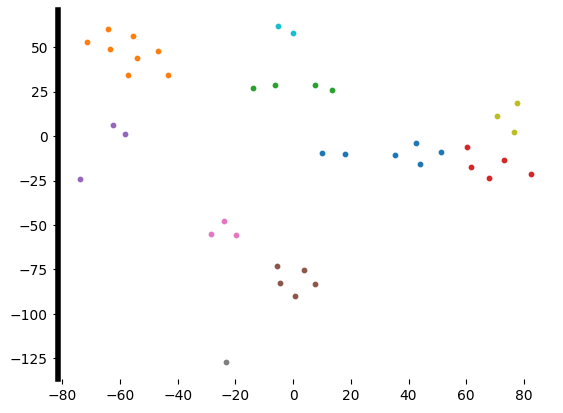

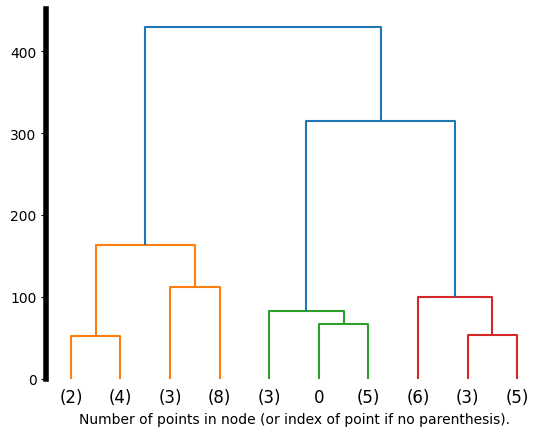

0.5533263
me11_07122021


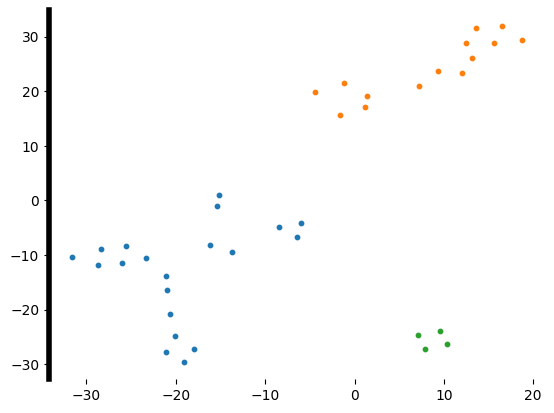

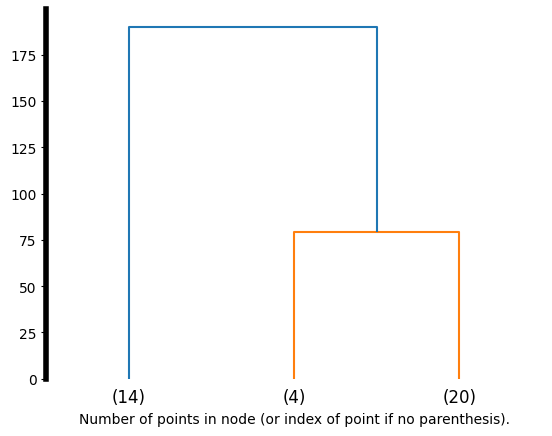

0.64957505
me11_08122021


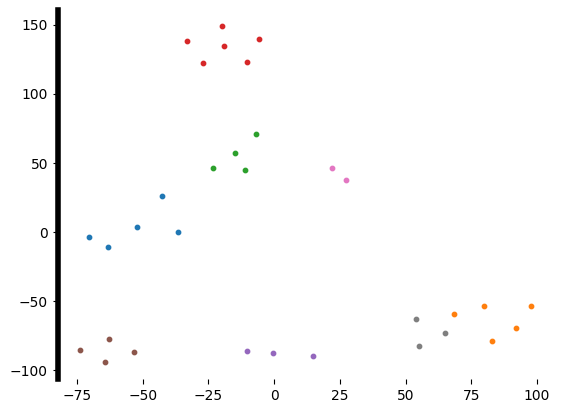

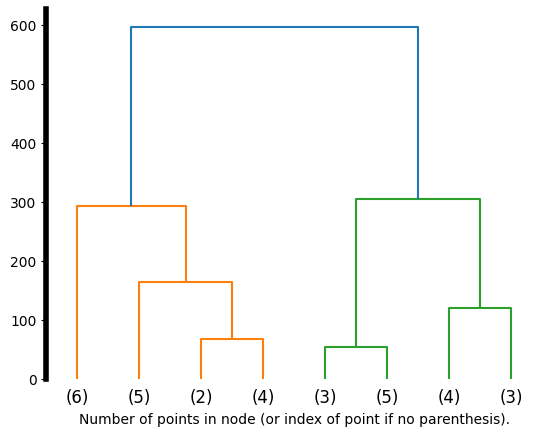

0.5877066
me11_09122021


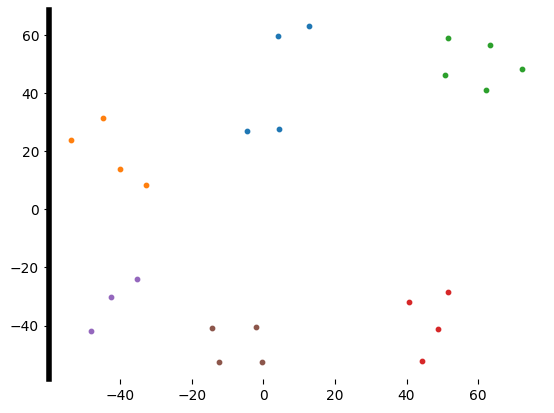

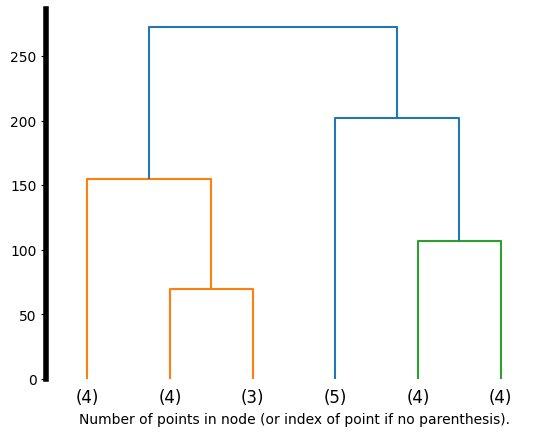

0.6333939
me11_10122021


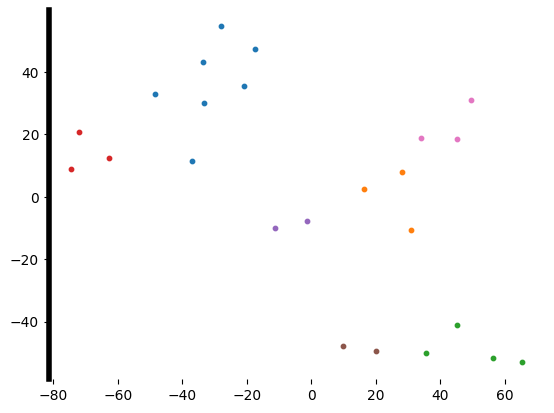

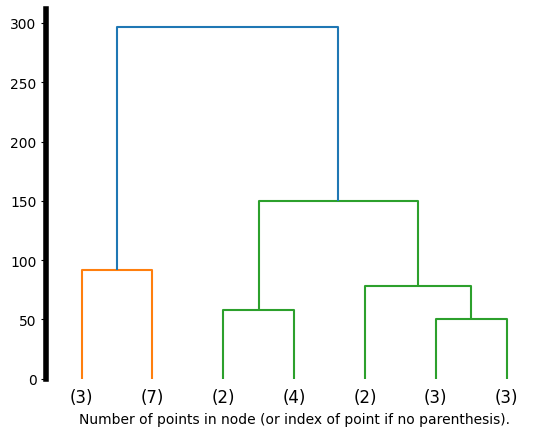

0.5122782
me11_12122021
Day excluded from pairwise analysis so exluded here too
me11_13122021
Day excluded from pairwise analysis so exluded here too
me11_30112021


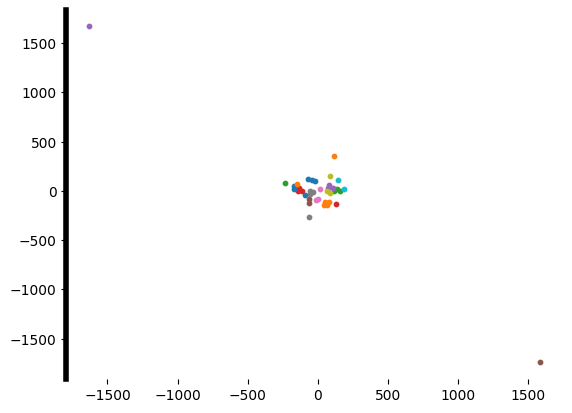

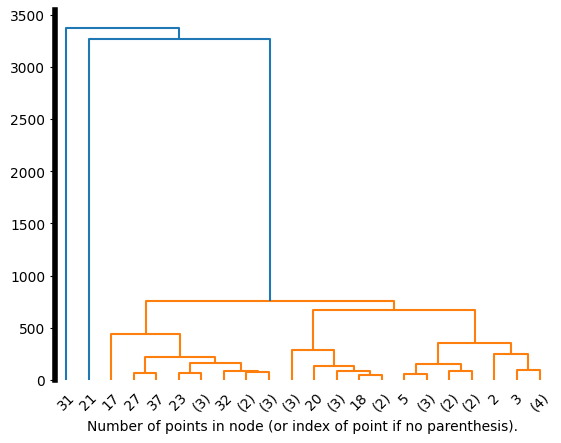

0.26365736


In [50]:
##Clustering 
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
num_components=2
day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')

for mouse_recday in day_type_array:
    print(mouse_recday)
    
    if mouse_recday not in Coherence_dic['coherent_tuning_prop'].keys():
        print('Day excluded from pairwise analysis so exluded here too')
        continue
        
    X_transformed_=module_dic[num_components]['tSNE'][mouse_recday]
    
    if len(X_transformed_)==0:
        print('Not analysed')
        print('')
        continue

    clustering=sklearn.cluster.AgglomerativeClustering(distance_threshold=50,n_clusters=None)

    X_clustered = clustering.fit(X_transformed_)

    clusters = X_clustered.labels_
    cluster_labels=np.unique(clusters)    
    cluster_distances=np.hstack((0,X_clustered.distances_[-len(cluster_labels)+1:]))

    cluster_positions=np.zeros(len(clusters))
    for cluster in cluster_labels:
        X_cluster=X_transformed_[clusters==cluster]
        if cluster == -1:
            plt.scatter(X_cluster[:,0],X_cluster[:,1],s=20, marker='x', color='black')
        else:
            plt.scatter(X_cluster[:,0],X_cluster[:,1],s=10)

        cluster_positions[clusters==cluster]=cluster_distances[cluster]


    plt.savefig(Output_folder+'/'+str(mouse_recday)+'_coherence_clusters.svg')
    plt.show()


    plot_dendrogram(X_clustered, truncate_mode='lastp', p=len(cluster_labels))
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

    if len(cluster_labels)>1 and len(clusters)>len(cluster_labels):
        silhouette_score_=silhouette_score(X_transformed_,clusters)
    else:
        silhouette_score_=np.nan

    print(silhouette_score_)
    module_dic[num_components]['clusters'][mouse_recday]=clusters
    module_dic[num_components]['cluster_positions'][mouse_recday]=cluster_positions
    module_dic[num_components]['silhouette_score'][mouse_recday]=silhouette_score_


In [120]:
###Permutations
tt=time.time()
angle_changes=np.linspace(0,360,5)[:-1]

module_shuff_dic=rec_dd()
num_iterations=100

day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')

num_components=2
redo=True

use_peak=False

#if use_peak==True:
#    sigma=15
#else:
#    sigma=7

sigma=np.load(Input_folder+'sigma_goalprogress.npy') 

for mouse_recday in day_type_array:
    print(mouse_recday)
    if mouse_recday not in Coherence_dic['coherent_tuning_prop'].keys():
        print('Day excluded from pairwise analysis so exluded here too')
        continue
    if redo==False:
        if len(module_shuff_dic['distance_matrix_used'][mouse_recday][0])>0:
            print('Already analysed')
            continue

    try:
        for iteration in range(num_iterations):
            
            X_transformed_=module_dic[num_components]['tSNE'][mouse_recday]
            if len(X_transformed_)==0:
                if iteration==0:
                    print('Not analysed')
                    print('')
                continue
            
            ephys_=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            initial_mean_angles=np.argmax(np.nanmean(ephys_,axis=1),axis=1)
            
            

            used_pairs=used_pairs_dic[mouse_recday]
            neurons_used=np.unique(used_pairs)

            X_angles=initial_mean_angles
            X_angles[np.isnan(X_angles)]=0


            ##randomly rotating neurons with jitter
            Y_angles=random_rotation(len(X_angles),angle_changes,sigma=sigma) ##default sigma=10 degrees
            Z_angles=random_rotation(len(X_angles),angle_changes,sigma=sigma)

            XY_angle_change_neuron=positive_angle(circular_angle(Y_angles,X_angles))
            XZ_angle_change_neuron=positive_angle(circular_angle(Z_angles,X_angles))

            pairXY=np.asarray([[positive_angle([circular_angle(XY_angle_change_neuron[ii],XY_angle_change_neuron[jj])])[0]\
                                for ii in range(len(X_angles))] for jj in range(len(X_angles))])



            pairXZ=np.asarray([[positive_angle([circular_angle(XZ_angle_change_neuron[ii],XZ_angle_change_neuron[jj])])[0]\
                                for ii in range(len(X_angles))] for jj in range(len(X_angles))])



            cosine_distXY=1-np.asarray([[math.cos(math.radians(pairXY[ii,jj]))\
                                        for ii in range(len(pairXY))] for jj in range(len(pairXY))])
            cosine_distXZ=1-np.asarray([[math.cos(math.radians(pairXZ[ii,jj]))\
                                        for ii in range(len(pairXZ))] for jj in range(len(pairXZ))])

            cosine_max=np.max((cosine_distXY,cosine_distXZ),axis=0)
            cosine_mean=np.mean((cosine_distXY,cosine_distXZ),axis=0)
            distance_matrix_all=cosine_max
            distance_matrix_used=distance_matrix_all[neurons_used][:,neurons_used]

            distance_used_pairs=matrix_triangle(distance_matrix_used,direction='lower')


            embedding = MDS(n_components=num_components,dissimilarity='precomputed')
            X_transformed = embedding.fit_transform(distance_matrix_used)
            
            perp_=module_dic[num_components]['perplexity_used_tSNE'][mouse_recday]
            embedding_TSNE=TSNE(n_components=num_components, init='random',metric='precomputed',perplexity=perp_)
            X_transformed_TSNE = embedding_TSNE.fit_transform(distance_matrix_used)

            if iteration==-1:
                print(mouse_recday)
                print(X_transformed.shape)
                print('MDS')
                fig = plt.figure()
                ax = fig.add_subplot(111)
                plt.scatter(X_transformed[:,0],X_transformed[:,1],s=5)
                plt.show()


                print('tSNE')

                plt.scatter(X_transformed_TSNE[:,0],X_transformed_TSNE[:,1],s=5)
                plt.show()
                print(embedding_TSNE.kl_divergence_)

                print('')
                print('')



            module_shuff_dic['tSNE'][mouse_recday][iteration]=X_transformed_TSNE
            module_shuff_dic['tSNE_KL_divergence'][mouse_recday][iteration]=embedding_TSNE.kl_divergence_

            module_shuff_dic['distance_matrix_all'][mouse_recday][iteration]=distance_matrix_all
            module_shuff_dic['distance_matrix_used'][mouse_recday][iteration]=distance_matrix_used
            
    except Exception as e:
        print(e)
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(exc_type, fname, exc_tb.tb_lineno)

print(time.time()-tt)

ab03_01092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ab03_02092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ab03_05092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ab03_06092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ab03_29082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ab03_30082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah03_12082021
Day excluded from pairwise analysis so exluded here too
ah03_13082021
Day excluded from pairwise analysis so exluded here too
ah03_18082021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah03_19082021
Day excluded from pairwise analysis so exluded here too
ah04_01122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_02122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_05122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_06122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_07122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_09122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_10122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_14122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_16122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_26112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah04_30112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah07_01092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah07_02092023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah07_27082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah07_28082023
Day excluded from pairwise analysis so exluded here too
ah07_29082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

ah07_30082023


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me08_06092021
Day excluded from pairwise analysis so exluded here too
me08_09092021
Day excluded from pairwise analysis so exluded here too
me08_10092021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me08_11092021
Day excluded from pairwise analysis so exluded here too
me08_12092021
Day excluded from pairwise analysis so exluded here too
me08_13092021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me10_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me10_09122021
Day excluded from pairwise analysis so exluded here too
me10_10122021
Day excluded from pairwise analysis so exluded here too
me10_14122021
Day excluded from pairwise analysis so exluded here too
me10_15122021
Day excluded from pairwise analysis so exluded here too
me10_16122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me10_17122021
Day excluded from pairwise analysis so exluded here too
me10_19122021
Day excluded from pairwise analysis so exluded here too
me10_20122021
Day excluded from pairwise analysis so exluded here too
me10_21122021
Day excluded from pairwise analysis so exluded here too
me11_01122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_02122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_05122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_06122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_07122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_08122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_09122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

me11_10122021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


me11_12122021
Day excluded from pairwise analysis so exluded here too
me11_13122021
Day excluded from pairwise analysis so exluded here too
me11_30112021


C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

1264.6702864170074


ab03_01092023


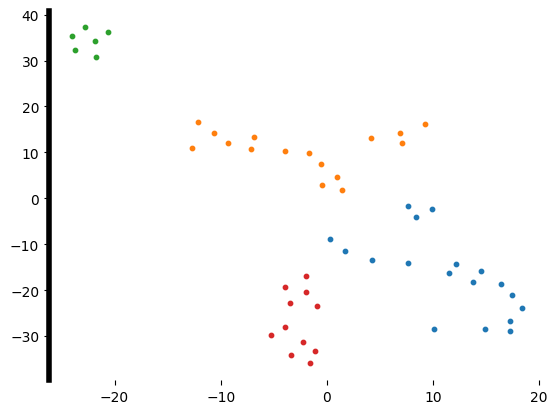

0.52650315
ab03_02092023


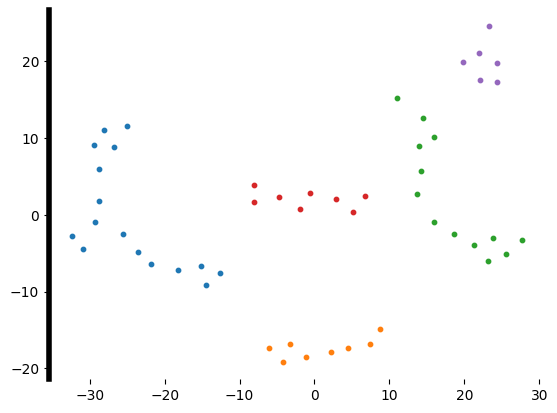

0.5273467
ab03_05092023


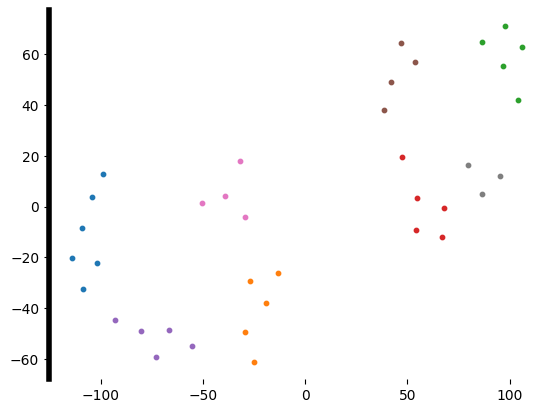

0.54521126
ab03_06092023


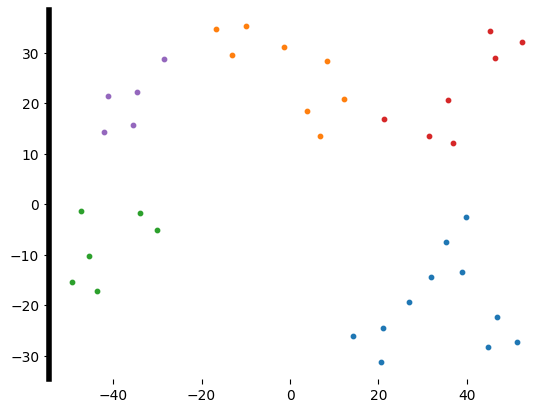

0.5242106
ab03_29082023


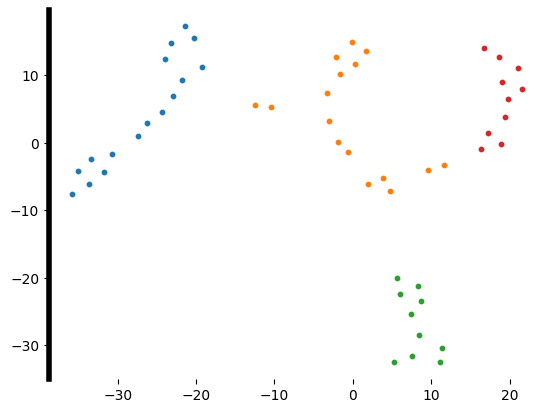

0.56281054
ab03_30082023


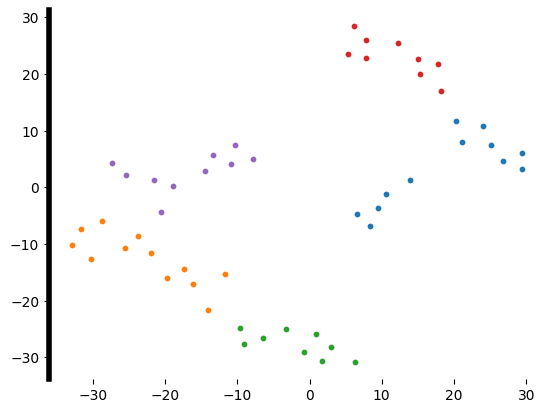

0.5076985
ah03_12082021
Day excluded from pairwise analysis so exluded here too
ah03_13082021
Day excluded from pairwise analysis so exluded here too
ah03_18082021


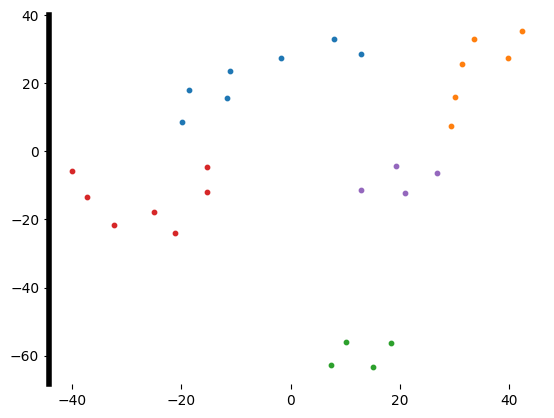

0.57166356
ah03_19082021
Day excluded from pairwise analysis so exluded here too
ah04_01122021


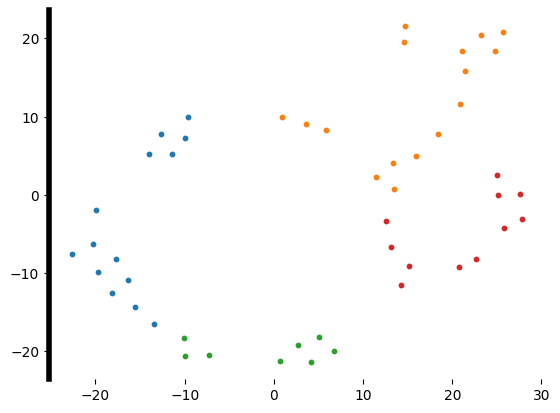

0.4345959
ah04_02122021


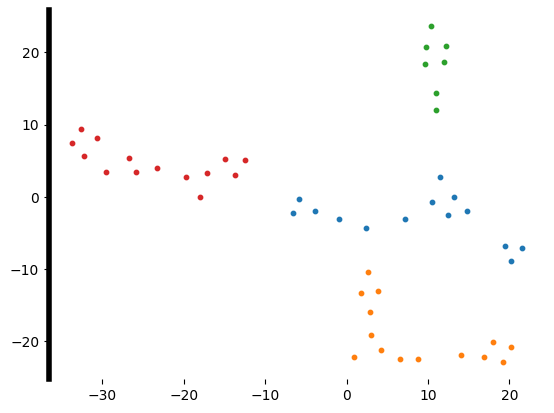

0.5288239
ah04_05122021


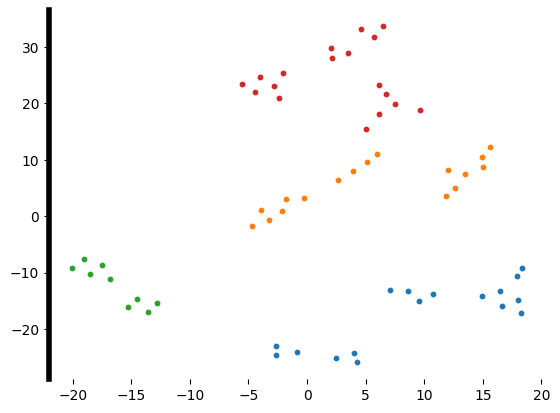

0.5306198
ah04_06122021


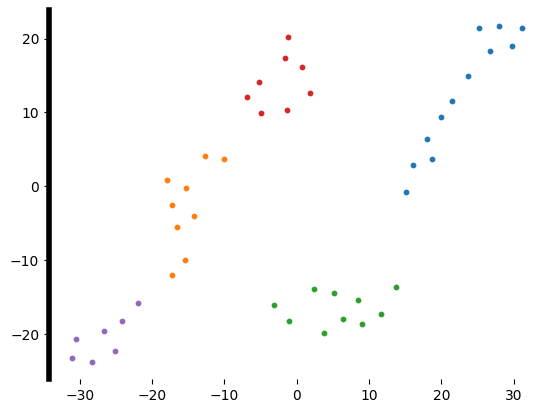

0.6237422
ah04_07122021


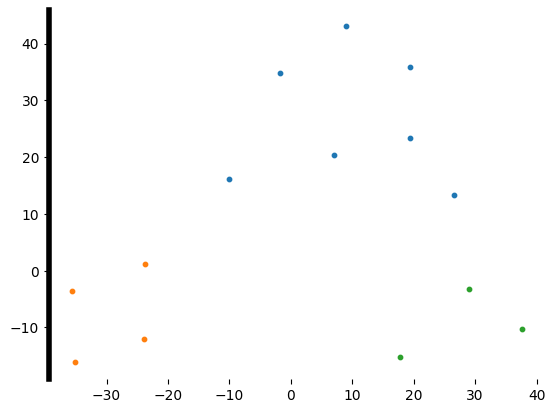

0.53092474
ah04_08122021


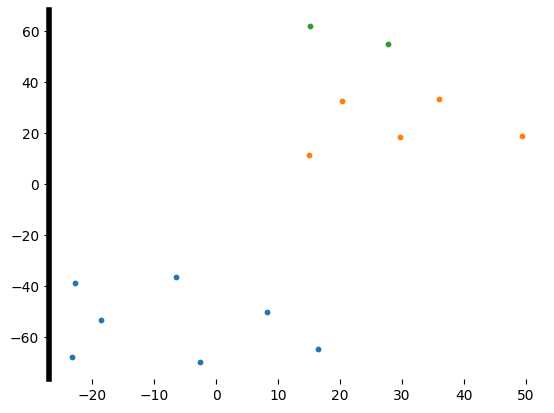

0.5671386
ah04_09122021


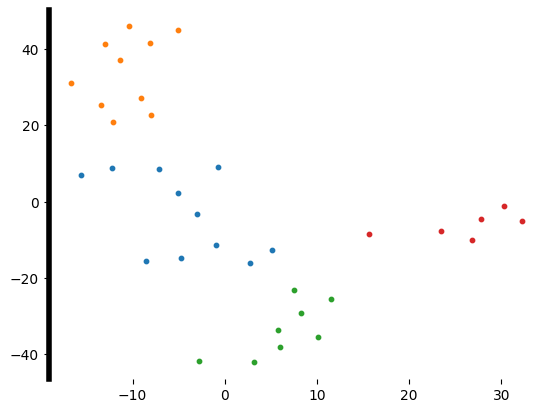

0.5696885
ah04_10122021


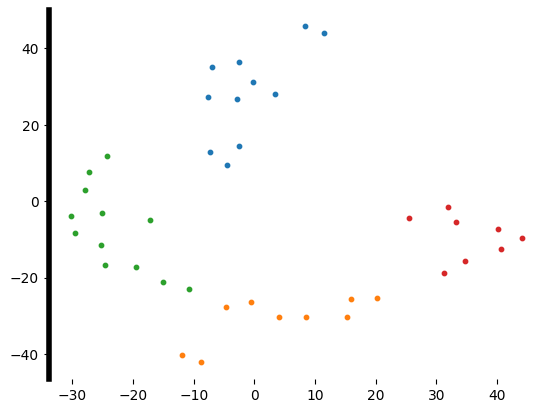

0.5475427
ah04_14122021


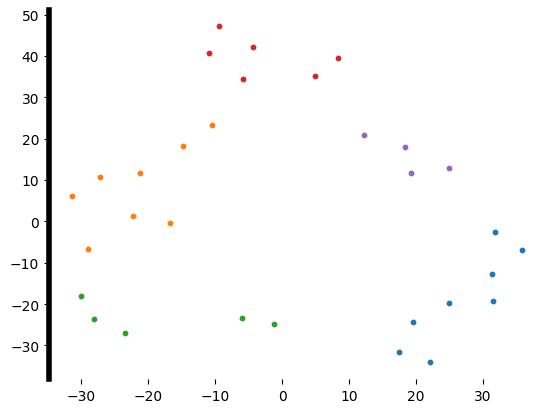

0.5103547
ah04_16122021


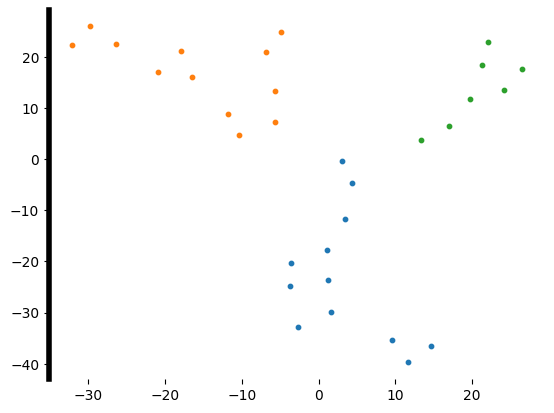

0.58655626
ah04_26112021


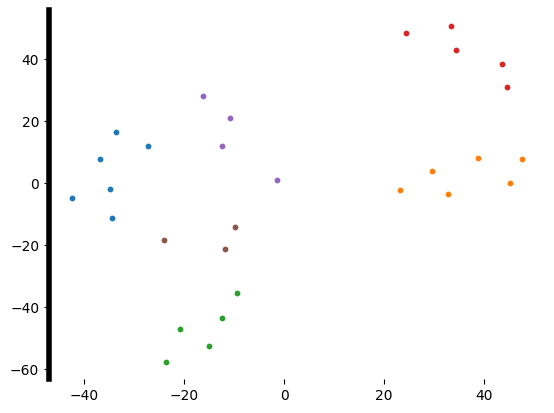

0.51757383
ah04_30112021


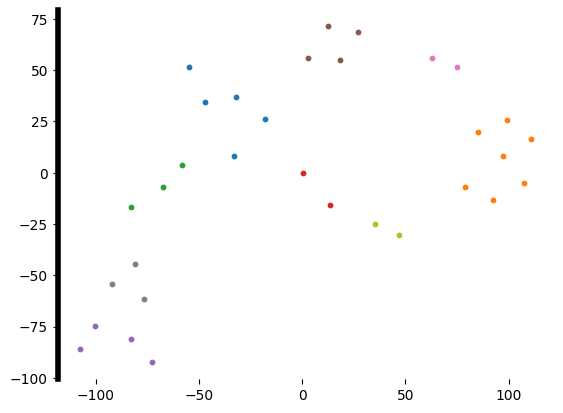

0.49690223
ah07_01092023


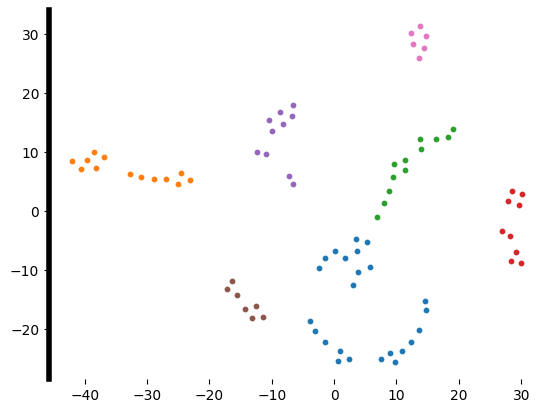

0.5814593
ah07_02092023


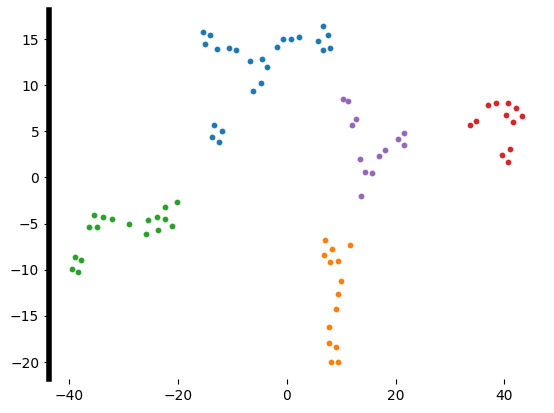

0.617708
ah07_27082023


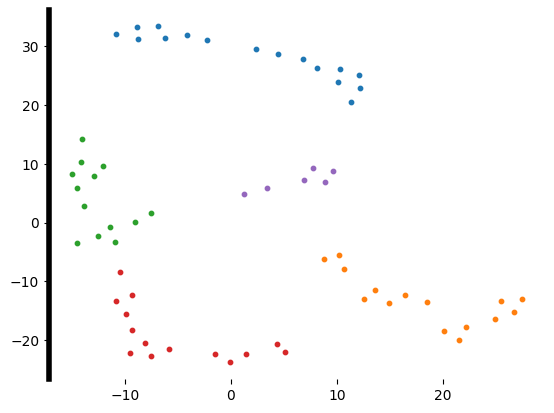

0.5557541
ah07_28082023
Day excluded from pairwise analysis so exluded here too
ah07_29082023


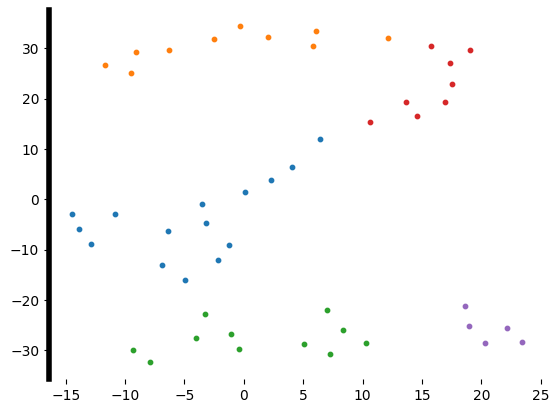

0.49102265
ah07_30082023


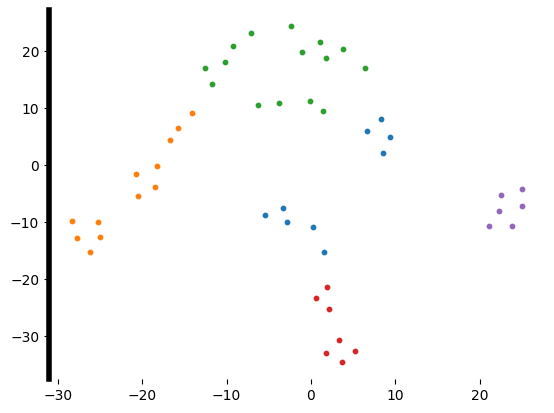

0.540487
me08_06092021
Day excluded from pairwise analysis so exluded here too
me08_09092021
Day excluded from pairwise analysis so exluded here too
me08_10092021


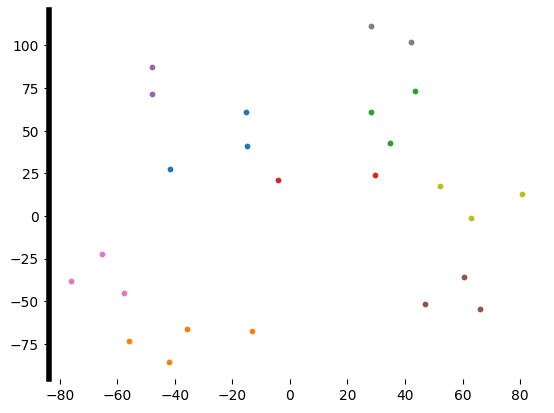

0.46025476
me08_11092021
Day excluded from pairwise analysis so exluded here too
me08_12092021
Day excluded from pairwise analysis so exluded here too
me08_13092021


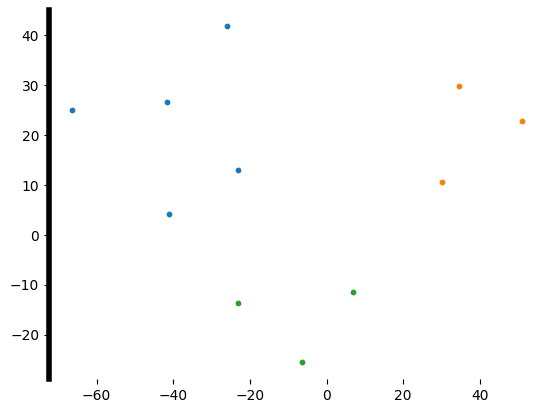

0.49954242
me10_08122021


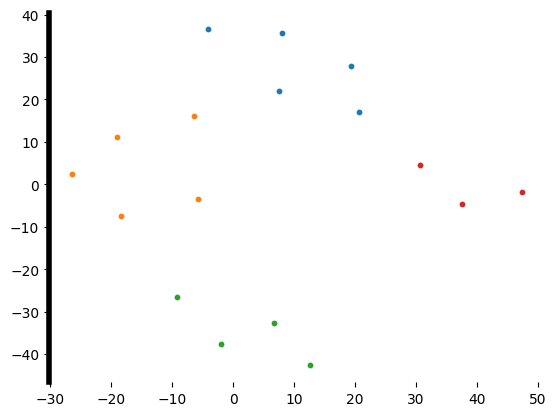

0.5226796
me10_09122021
Day excluded from pairwise analysis so exluded here too
me10_10122021
Day excluded from pairwise analysis so exluded here too
me10_14122021
Day excluded from pairwise analysis so exluded here too
me10_15122021
Day excluded from pairwise analysis so exluded here too
me10_16122021


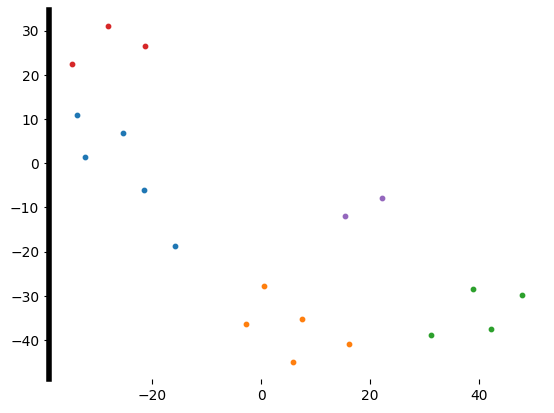

0.5156297
me10_17122021
Day excluded from pairwise analysis so exluded here too
me10_19122021
Day excluded from pairwise analysis so exluded here too
me10_20122021
Day excluded from pairwise analysis so exluded here too
me10_21122021
Day excluded from pairwise analysis so exluded here too
me11_01122021


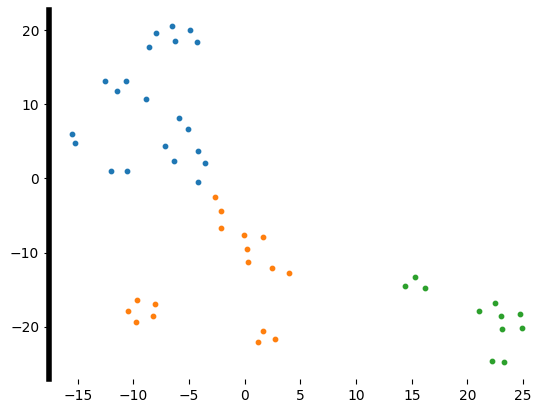

0.57653016
me11_02122021


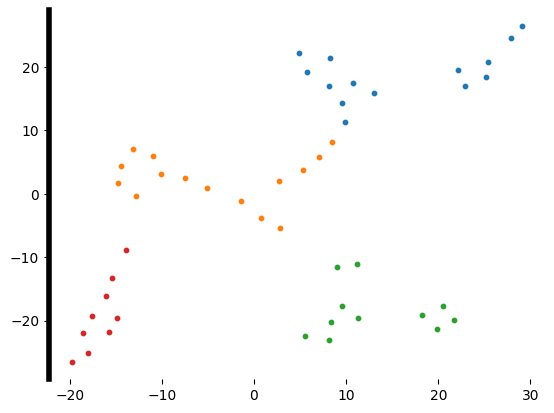

0.56375414
me11_05122021


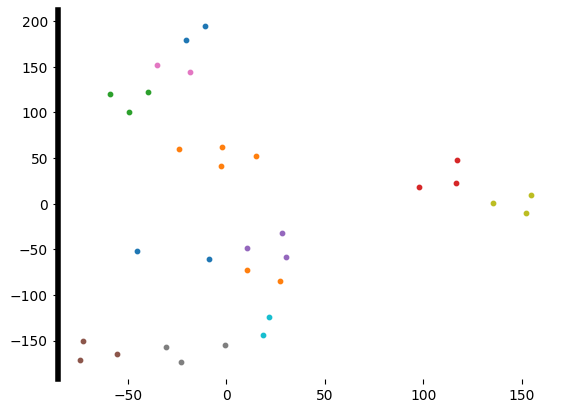

0.4693574
me11_06122021


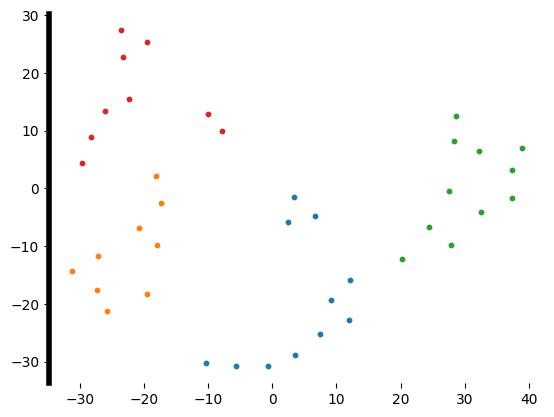

0.50022304
me11_07122021


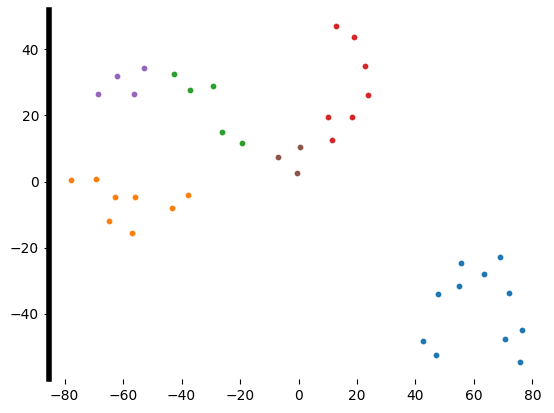

0.5216627
me11_08122021


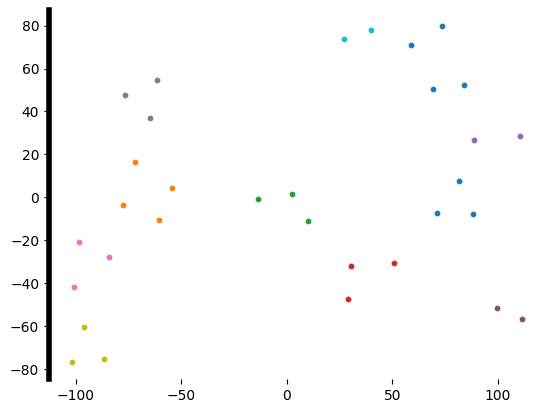

0.5045031
me11_09122021


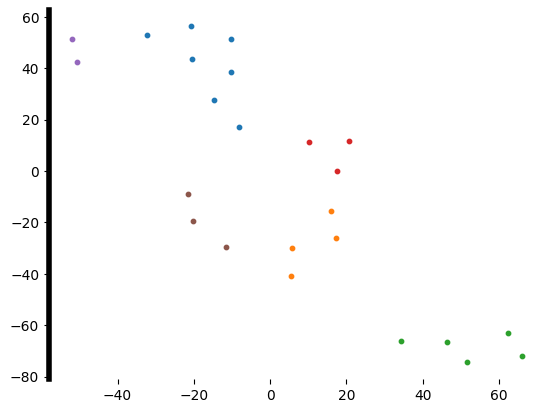

0.50700456
me11_10122021


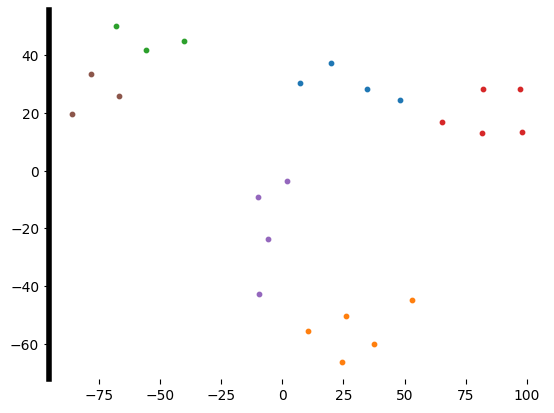

0.51007456
me11_12122021
Day excluded from pairwise analysis so exluded here too
me11_13122021
Day excluded from pairwise analysis so exluded here too
me11_30112021


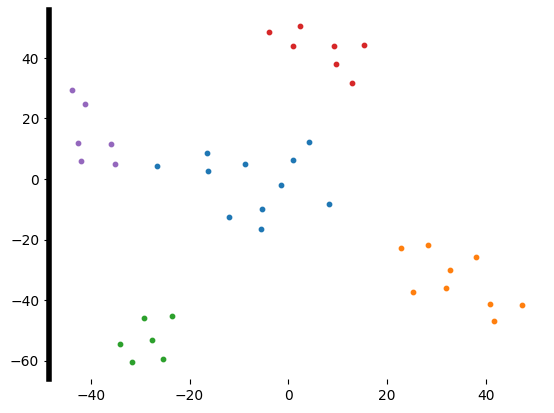

0.6396459


In [122]:
##clustering- representative shuffles
day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')
for mouse_recday_ind, mouse_recday in enumerate(day_type_array):
    try:
        print(mouse_recday)
        
        if mouse_recday not in Coherence_dic['coherent_tuning_prop'].keys():
            print('Day excluded from pairwise analysis so exluded here too')
            continue
        KL_divegrence_shuff=dict_to_array(module_shuff_dic['tSNE_KL_divergence'][mouse_recday])
        mean_divergence=np.mean(KL_divegrence_shuff)

        closest_ind=np.argmin(np.abs(KL_divegrence_shuff-mean_divergence))
        X_transformed_=module_shuff_dic['tSNE'][mouse_recday][closest_ind]

        clustering=sklearn.cluster.AgglomerativeClustering(distance_threshold=50,n_clusters=None)

        X_clustered = clustering.fit(X_transformed_)

        clusters = X_clustered.labels_
        cluster_labels=np.unique(clusters)

        neurons_used=module_dic['neurons_used'][mouse_recday]

        for cluster in cluster_labels:
            X_cluster=X_transformed_[clusters==cluster]
            if cluster == -1:
                plt.scatter(X_cluster[:,0],X_cluster[:,1],s=20, marker='x', color='black')
            else:
                plt.scatter(X_cluster[:,0],X_cluster[:,1],s=10)


        plt.show()
        #print(module_shuff_dic['tSNE_KL_divergence'][mouse_recday][closest_ind])

        if len(cluster_labels)>1 and len(clusters)>len(cluster_labels):
            silhouette_score_=silhouette_score(X_transformed_,clusters)
        else:
            silhouette_score_=np.nan
        module_shuff_dic['silhouette_score'][mouse_recday]=silhouette_score_

        print(silhouette_score_)
    except Exception as e:
        print(e)
        

In [123]:
###Calculating silhouette score for shuffled data

day_type='3_task_all'
day_type_array=np.load(Input_folder+day_type+'_days.npy')
for mouse_recday_ind, mouse_recday in enumerate(day_type_array):
    print(mouse_recday)
    if mouse_recday not in Coherence_dic['coherent_tuning_prop'].keys():
        
        print('Day excluded from pairwise analysis so exluded here too')
        if isinstance(module_shuff_dic['silhouette_score_mean'][mouse_recday],float)==True:
            del(module_shuff_dic['silhouette_score_mean'][mouse_recday])
        continue
    try:
        silhouette_scores=np.zeros(num_iterations)
        
        

        X_transformed_=module_dic[num_components]['tSNE'][mouse_recday]
        if len(X_transformed_)==0:
            print('Not analysed')

            continue
        for iteration in range(num_iterations):



            X_transformed_=module_shuff_dic['tSNE'][mouse_recday][iteration]

            #eps_=70+500/len(X_transformed)
            #clustering = DBSCAN(eps=eps_, min_samples=2)
            #clustering=sklearn.cluster.AgglomerativeClustering(n_clusters=5)
            clustering=sklearn.cluster.AgglomerativeClustering(distance_threshold=50,n_clusters=None)

            X_clustered = clustering.fit(X_transformed_)

            clusters = X_clustered.labels_
            cluster_labels=np.unique(clusters)



            plt.show()
            #print(module_shuff_dic['tSNE_KL_divergence'][mouse_recday][closest_ind])

            if len(cluster_labels)>1 and len(clusters)>len(cluster_labels):
                silhouette_score_=silhouette_score(X_transformed_,clusters)
            else:
                silhouette_score_=np.nan

            silhouette_scores[iteration]=silhouette_score_

        module_shuff_dic['silhouette_score_mean'][mouse_recday]=np.nanmean(silhouette_scores)
        module_shuff_dic['silhouette_score_95percentile'][mouse_recday]=np.percentile(remove_nan(silhouette_scores),95)
    except Exception as e:
        print(e)


ab03_01092023
ab03_02092023
ab03_05092023
ab03_06092023
ab03_29082023
ab03_30082023
ah03_12082021
Day excluded from pairwise analysis so exluded here too
ah03_13082021
Day excluded from pairwise analysis so exluded here too
ah03_18082021
ah03_19082021
Day excluded from pairwise analysis so exluded here too
ah04_01122021
ah04_02122021
ah04_05122021
ah04_06122021
ah04_07122021
ah04_08122021
ah04_09122021
ah04_10122021
ah04_14122021
ah04_16122021
ah04_26112021
ah04_30112021
ah07_01092023
ah07_02092023
ah07_27082023
ah07_28082023
Day excluded from pairwise analysis so exluded here too
ah07_29082023
ah07_30082023
me08_06092021
Day excluded from pairwise analysis so exluded here too
me08_09092021
Day excluded from pairwise analysis so exluded here too
me08_10092021
me08_11092021
Day excluded from pairwise analysis so exluded here too
me08_12092021
Day excluded from pairwise analysis so exluded here too
me08_13092021
me10_08122021
me10_09122021
Day excluded from pairwise analysis so exluded h

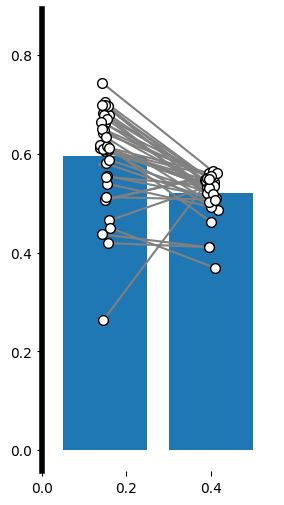

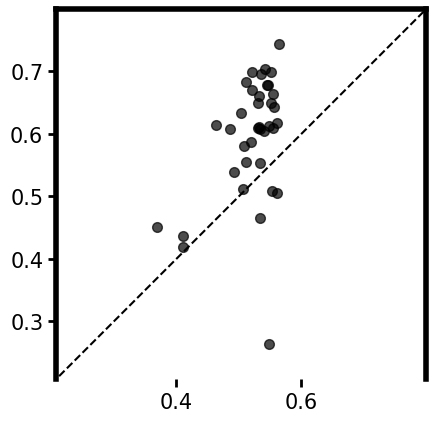

WilcoxonResult(statistic=65.0, pvalue=2.4650507839396596e-06)
37


In [124]:
num_components=2
SS_real=np.hstack(([module_dic[num_components]['silhouette_score'][mouse_recday]\
for mouse_recday in module_dic[num_components]['silhouette_score'].keys()]))
SS_permuted=np.hstack(([module_shuff_dic['silhouette_score_mean'][mouse_recday]\
for mouse_recday in module_dic[num_components]['silhouette_score'].keys()]))

SS_permuted=np.hstack((SS_permuted))

bar_plotX([SS_real,SS_permuted],'none',0,0.85,'points','paired',0.025)
plt.savefig(Output_folder+'/SS_clustering_realvspermuted.svg')
plt.show()


xy=column_stack_clean(SS_permuted,SS_real)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.gca().set_aspect('equal', adjustable='box')
plt.tick_params(axis='both',  labelsize=15)
plt.tick_params(width=2, length=6)

plt.savefig(Output_folder+'/SS_clustering_realvspermuted_scatter.svg')
plt.show()
print(st.wilcoxon(xy[:,0],xy[:,1]))
print(len(xy))